# Capture Traces for 27.12

In [1]:
%run "./Capture_traces_General.ipynb"

C:\Users\Samuel\AppData\Local\Temp\ipykernel_17160\4114886631.py:4: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  import pkg_resources


✔️ The File uploader succesfuly imported.
✔️ The Setuper class succesfuly imported.
✔️ The ANN_Observer class succesfuly imported.
✔️ The Analyser succesfuly runned.
✔️ The General functions/agregate succesfuly imported.


## Target [UINT8_T NO_OPT RAND] Measurement: 

  1. Measure target device in action
  2. Show dynamic SPA
  3. Calculate correlation matrixes (for 4 methods, that is HW8, HW32,  Abs8, Abs32) 

In [2]:
#firmwareName = 'basic_quantized3_MLP-Rand'
firmwareName = 'basic_quantized_MLP-NO_OPT-Rand'
epochs_list = [1000]
decimate = 1
reverse = False

In [3]:
scope, target, cw_setuper = setup(f"makefile_dir_{firmwareName}")
time.sleep(10)

⚠️ Changed, firmware config!!!
✔️ Firmware maked, with command cd %s | make CRYPTO_TARGET=%s PLATFORM=%s FIRMWAREPATH=%s SS_VER=%s TARGET=%s> output.txt 2>warnings_new.txt.
INFO: Found ChipWhisperer😍
✔️ INFO: Scope and Target, are set😍
❤️ Target hex: ./makefile_dir_basic_quantized_MLP-NO_OPT-Rand/simpleserial-target-CWLITEARM.hex
Detected known STMF32: STM32F302xB(C)/303xB(C)
Extended erase (0x44), this can take ten seconds or more
Attempting to program 22815 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 22815 bytes
✔️ Setuper initiated.


Capturing and Analysing the traces::   0%|          | 0/1 [00:00<?, ?it/s]

⚠️ Generating rand_input..


                                Capturing traces:   0%|          | 0/1000 [00:00<?, ?it/s]

(ChipWhisperer Scope WARNING|File _OpenADCInterface.py:642) Timeout in OpenADC capture(), no trigger seen! Trigger forced, data is invalid. Status: 0b
(ChipWhisperer Scope WARNING|File _OpenADCInterface.py:642) Timeout in OpenADC capture(), no trigger seen! Trigger forced, data is invalid. Status: 0a
(ChipWhisperer Target WARNING|File SimpleSerial2.py:514) Unexpected start to command 101
(ChipWhisperer Target WARNING|File SimpleSerial2.py:502) Read timed out: 


Target timed out!
✔️ Saving Rand_input succesfull.
🌍 Saving Secret_weights succesfull.
CWbytearray(b'00 72 16 ff 4d 4c 34 14 e4 f0 00 74 73 cd 3a 33 f0 fe 00 4d d2 2c 55 2a 00 01 00')


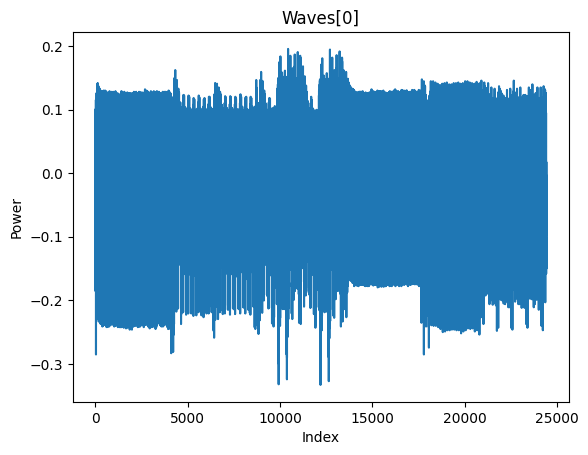

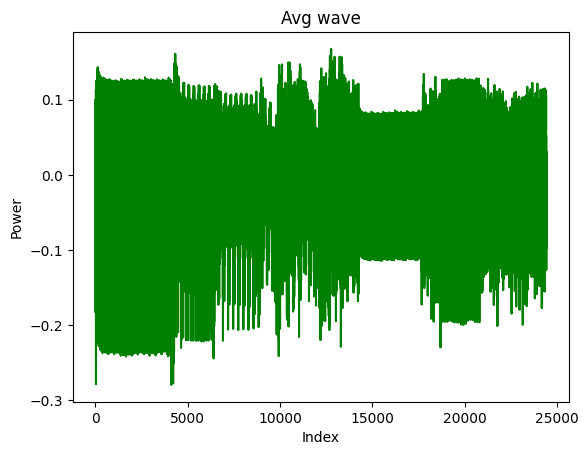

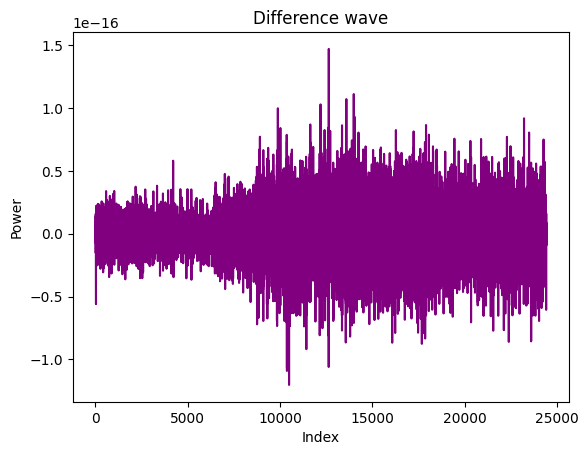

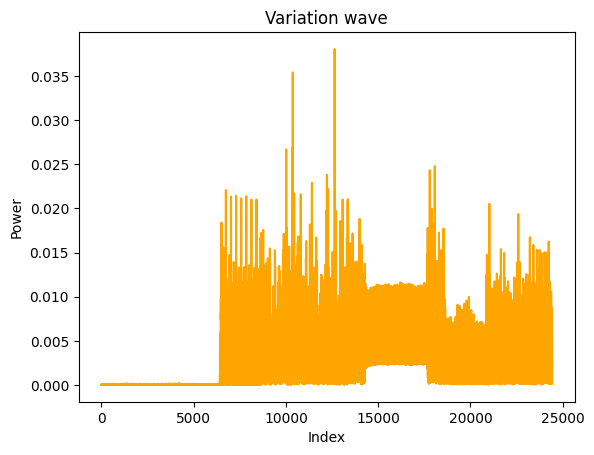

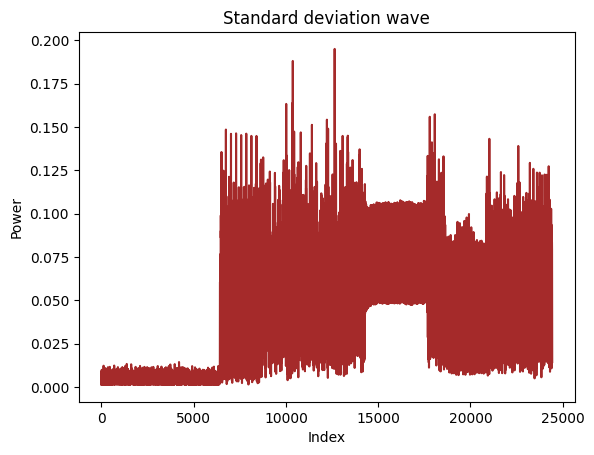

Calculating Correlations for the Secret-Key:   0%|          | 0/256 [00:00<?, ?it/s]

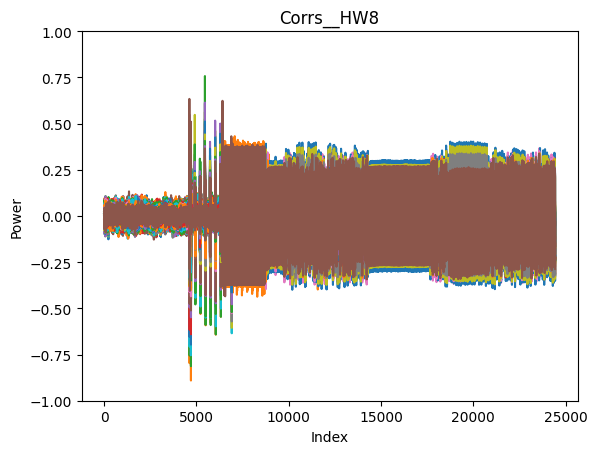

Calculating Correlations for the Secret-Key:   0%|          | 0/256 [00:00<?, ?it/s]

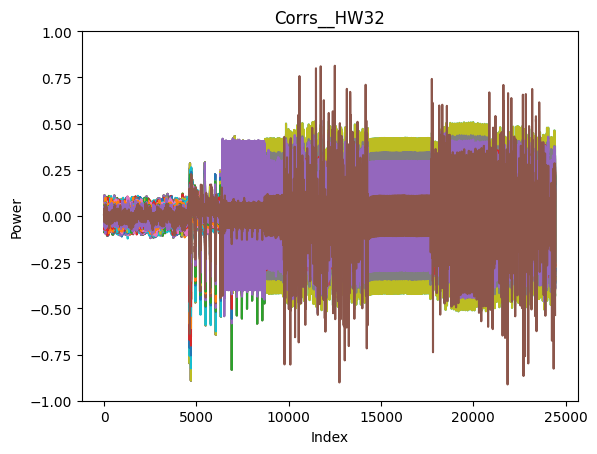

Calculating Correlations for the Secret-Key:   0%|          | 0/256 [00:00<?, ?it/s]

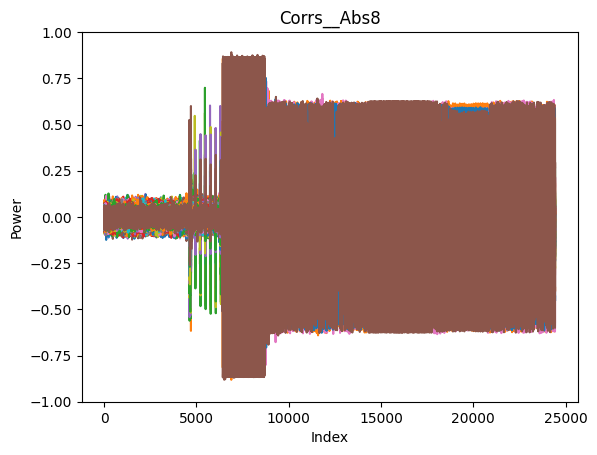

Calculating Correlations for the Secret-Key:   0%|          | 0/256 [00:00<?, ?it/s]

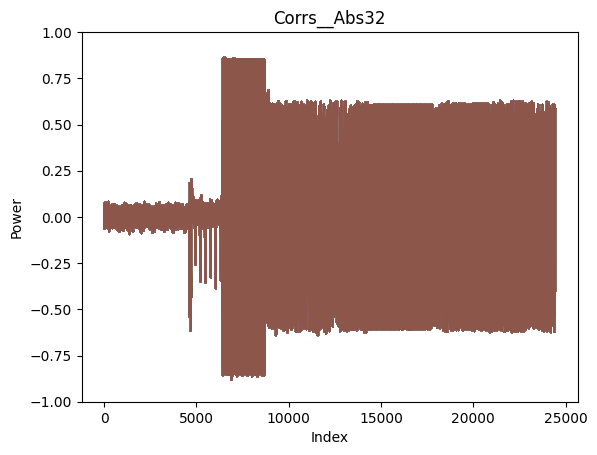

✔️ Scope disconnected.
✔️ Firmware disconnected.


In [4]:
corr_HW8, corr_HW32, corr_Abs8, corr_Abs32, rand_inputs, waves, out, diff_avg, avg_wave, var = capture_correlate(scope=scope,
                                                                                                                      epochs_list = epochs_list,
                                                                                                                      decimate = decimate,
                                                                                                                      reverse = reverse,
                                                                                                                      runName=firmwareName)

### SPA

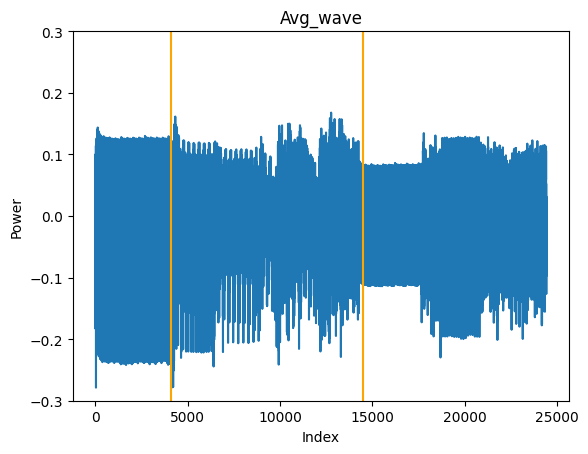

In [33]:
activity_borders = [4100, 14500]
avg_wave = np.array(avg_wave)
image = plot_mult(avg_wave, _type = f"avg_wave_{firmwareName}", mult=False, ylim=[-0.3,0.3], graph_title="Avg_wave", ylabel="Power", borders = activity_borders)

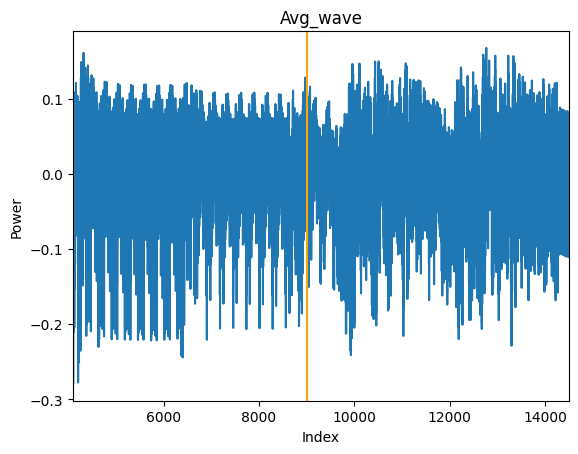

In [43]:
prev_borders = next_borders
layer_borders = [4100, 9000]
avg_wave = np.array(avg_wave)
image = plot_mult(avg_wave, _type = "ANN_Active", mult=False, xlim=[activity_borders[0],activity_borders[1]], graph_title="Avg_wave",
                  ylabel="Power", borders = layer_borders)

#### SPA of neuron's 1. layer

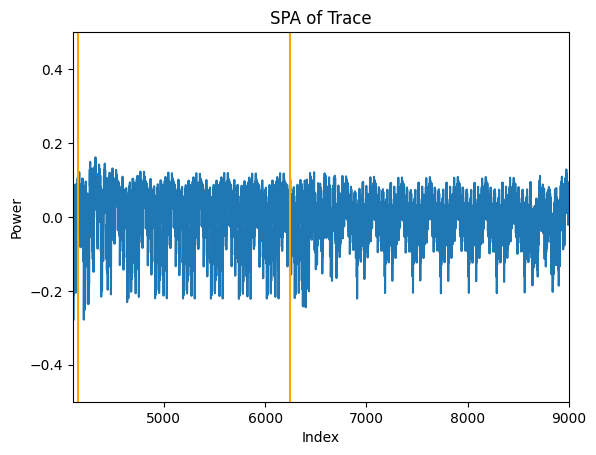

In [44]:
prev_borders = next_borders
neuron_borders = [4150, 6250]
avg_wave = np.array(avg_wave)
plot_mult(avg_wave, _type = "Layer1", mult=False, xlim=[layer_borders[0],layer_borders[1]], ylim=[-0.5,0.5], graph_title="SPA of Trace",
          ylabel="Power", borders = neuron_borders)
offset = next_borders[1] - next_borders[0]

##### SPA of neuron's 1. layer, 1. neuron

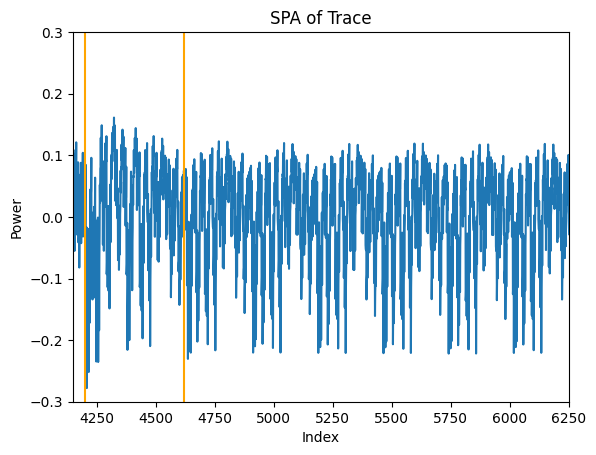

In [47]:
prev_borders = next_borders
mult_borders = [4200, 4620]
avg_wave = np.array(avg_wave)
plot_mult(avg_wave, _type = "Layer1_Neuron_1th", mult=False, xlim=[neuron_borders[0],neuron_borders[1]], ylim=[-0.3,0.3], graph_title="SPA of Trace",
          ylabel="Power", borders = mult_borders)

###### SPA of neuron's 1. layer, 1. neuron, 1. multiplication

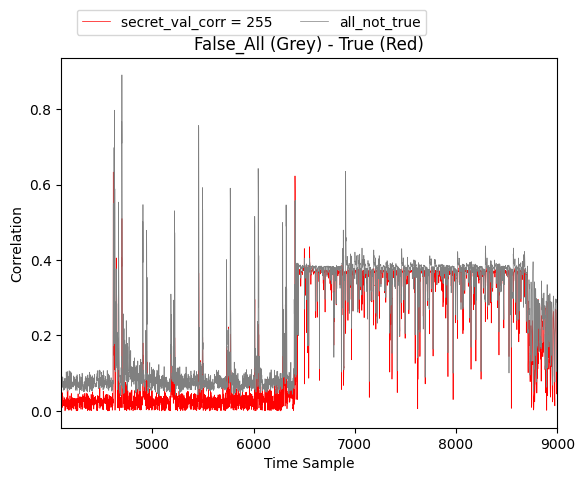

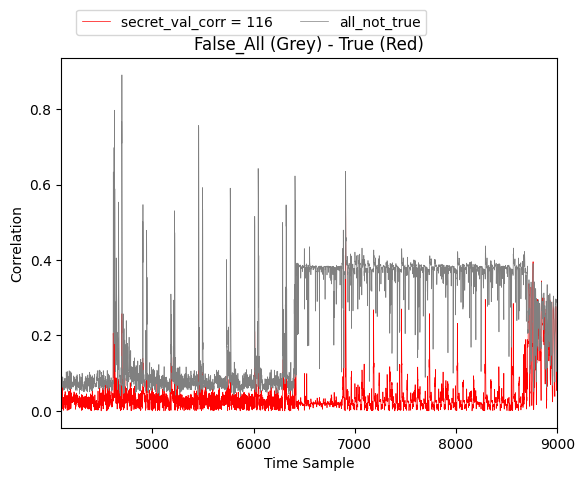

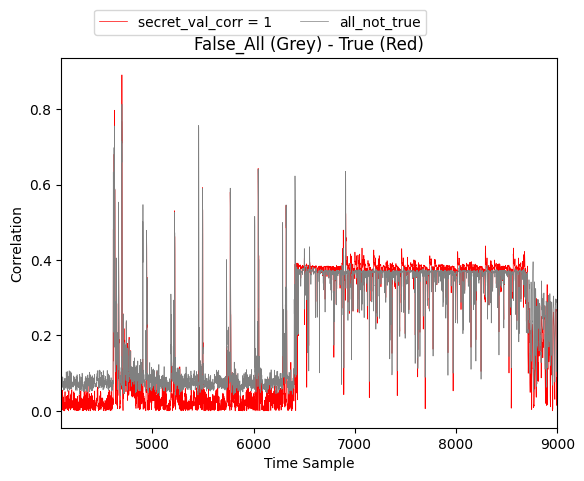

In [53]:

compTrueToAll_corrMatrix(corr_map, true_secret = 255, xlim=[4100, 9000], true_last = False, saveName = f'CPA_mult_level_secret[{255}]')
compTrueToAll_corrMatrix(corr_map, true_secret = 116, xlim=[4100, 9000], true_last = False, saveName = f'CPA_mult_level_secret[{116}]')
compTrueToAll_corrMatrix(corr_map, true_secret = 1, xlim=[4100, 9000], true_last = False, saveName = f'CPA_mult_level_secret[{1}]')

[255  77  76  52  20 228 240   0 116 115 205  58  51 240 254   0  77 210
  44  85]


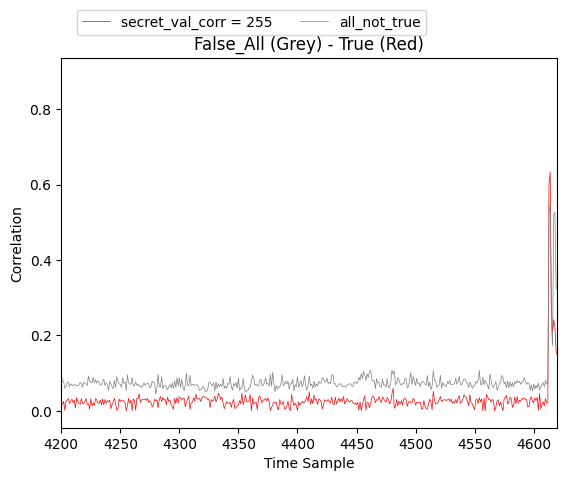

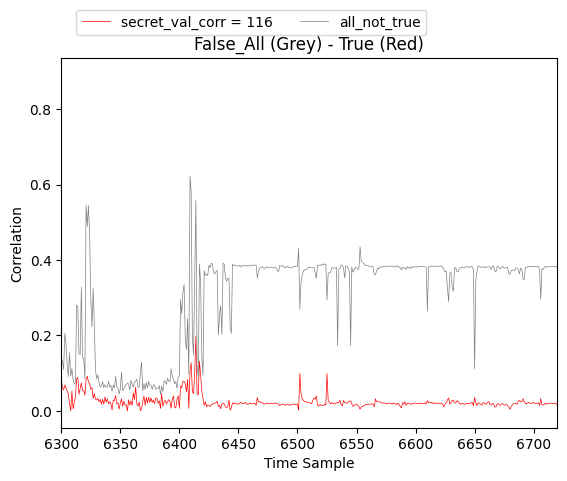

In [49]:
prev_borders = next_borders
secrets = np.array(out)[3:-4]
print(secrets)
corr_map = abs(np.array(corr_HW8))
akt_borders = np.array(mult_borders) + 0

compTrueToAll_corrMatrix(corr_map, true_secret = 255, xlim=[akt_borders[0],akt_borders[1]], true_last = False, saveName = f'CPA_mult_level_secret[{i}]')
akt_borders = akt_borders + offset
compTrueToAll_corrMatrix(corr_map, true_secret = 116, xlim=[akt_borders[0],akt_borders[1]], true_last = False, saveName = f'CPA_mult_level_secret[{i}]')

### CPA

##### CPA, weight extraction - Abs8

Hello 255
Peak range: 0.3
24429
 Index of global max: 6886 and global_max_val: 0.8912890844926517


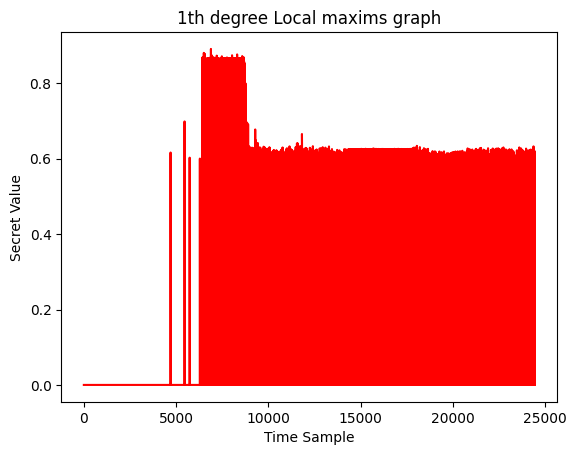

Number of uniques: 6
Number of local maxims: 2780
Uniquess: [1, 192, 224, 255, 116, 140]
Local maxims: [1, 192, 192, 224, 224, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255

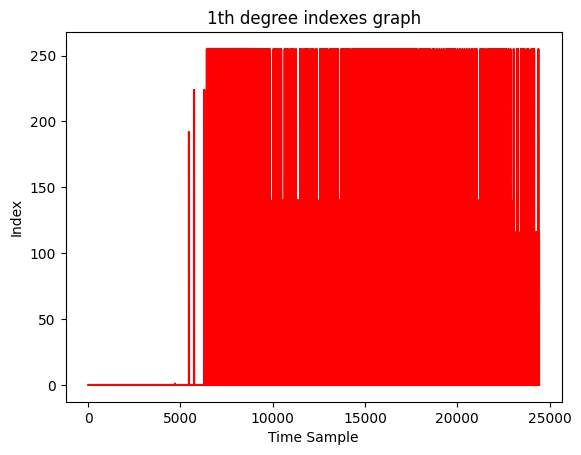

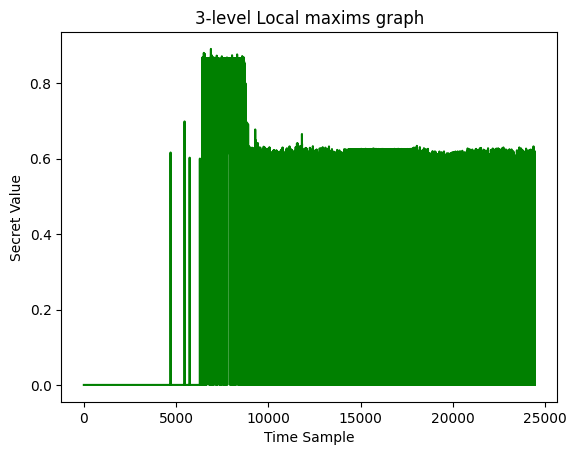

Number of uniques: 6
Number of local maxims: 4351
Uniquess: [1, 192, 224, 255, 116, 140]
Local maxims: [1, 192, 192, 224, 224, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 1, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 1, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 25

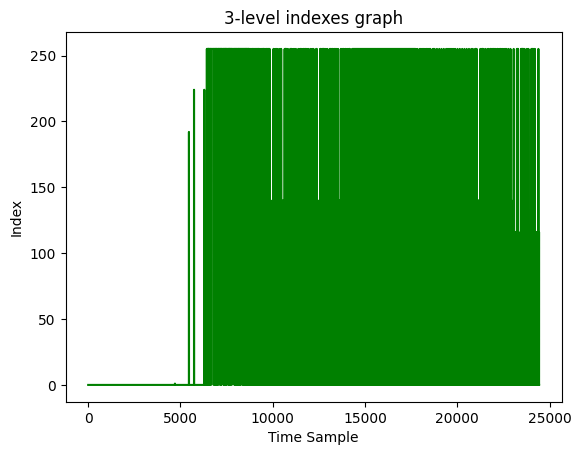

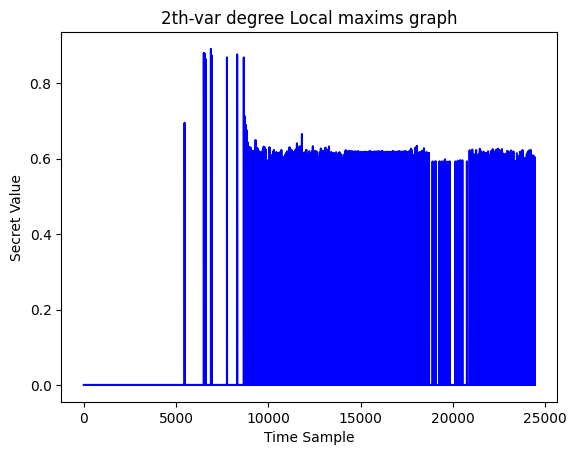

Number of uniques: 5
Number of local maxims: 390
Uniquess: [192, 255, 116, 1, 140]
Local maxims: [192, 255, 255, 255, 255, 255, 255, 255, 255, 255, 116, 116, 116, 116, 255, 255, 255, 116, 255, 255, 116, 255, 116, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 116, 255, 116, 116, 255, 255, 255, 255, 255, 255, 255, 116, 255, 255, 255, 116, 255, 116, 116, 255, 255, 1, 1, 116, 116, 116, 1, 255, 116, 1, 1, 1, 255, 140, 1, 255, 116, 255, 255, 1, 255, 140, 255, 116, 255, 255, 1, 1, 1, 255, 116, 1, 1, 1, 1, 116, 255, 1, 1, 1, 1, 1, 140, 116, 1, 255, 1, 1, 255, 255, 116, 116, 116, 140, 140, 116, 255, 116, 1, 140, 1, 1, 255, 1, 116, 255, 116, 140, 1, 1, 1, 1, 255, 255, 116, 255, 1, 255, 1, 116, 116, 1, 116, 255, 116, 140, 116, 255, 255, 255, 255, 116, 1, 255, 140, 140, 116, 140, 255, 1, 1, 116, 1, 255, 255, 1, 255, 255, 1, 255, 1, 1, 1, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255

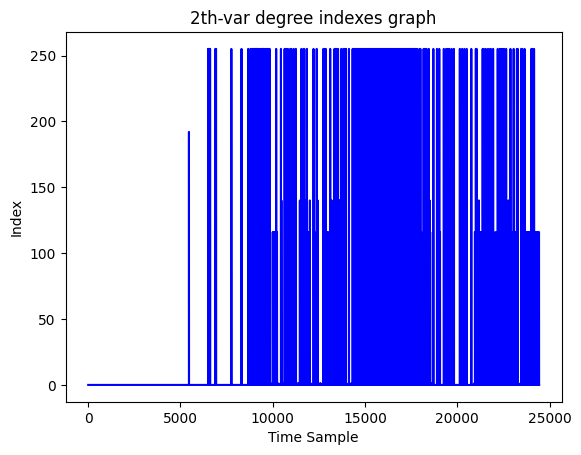

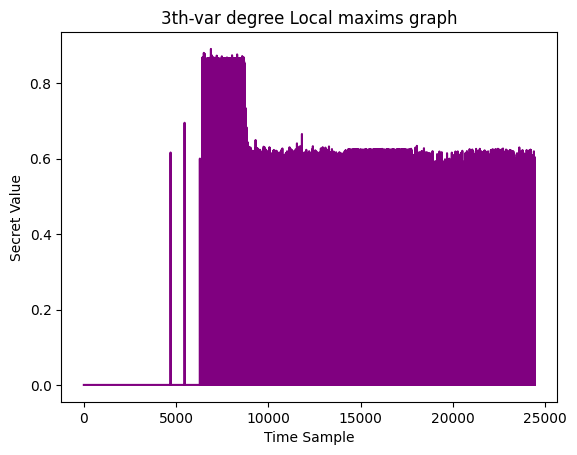

Number of uniques: 6
Number of local maxims: 1798
Uniquess: [1, 192, 224, 255, 116, 140]
Local maxims: [1, 192, 224, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255

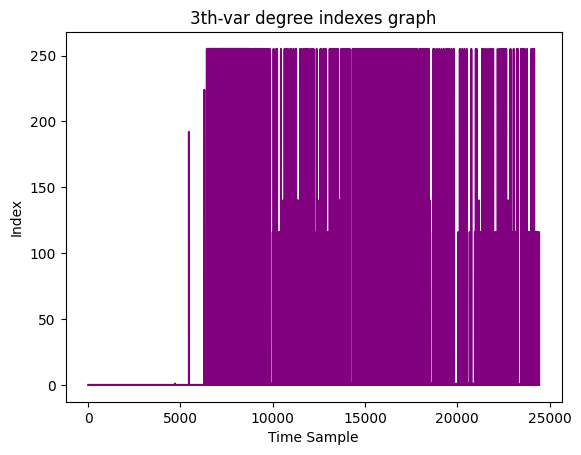

In range 0 - 24429
 Found the soonest secret value is 192, at the time sample 5458, with correlation secret_corr = 0.695


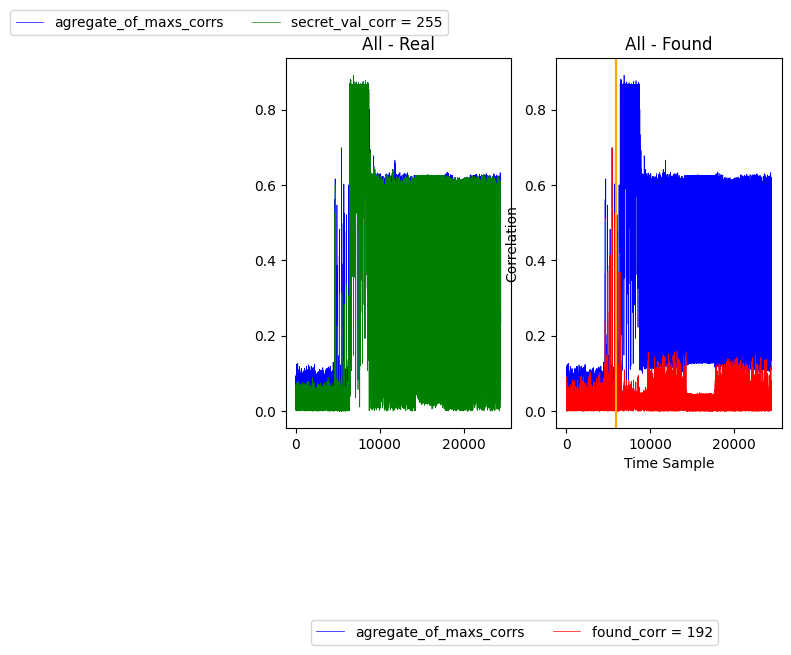

Hello 77
In range 5979 - 24429
 Found the soonest secret value is 255, at the time sample 6501, with correlation secret_corr = 0.881


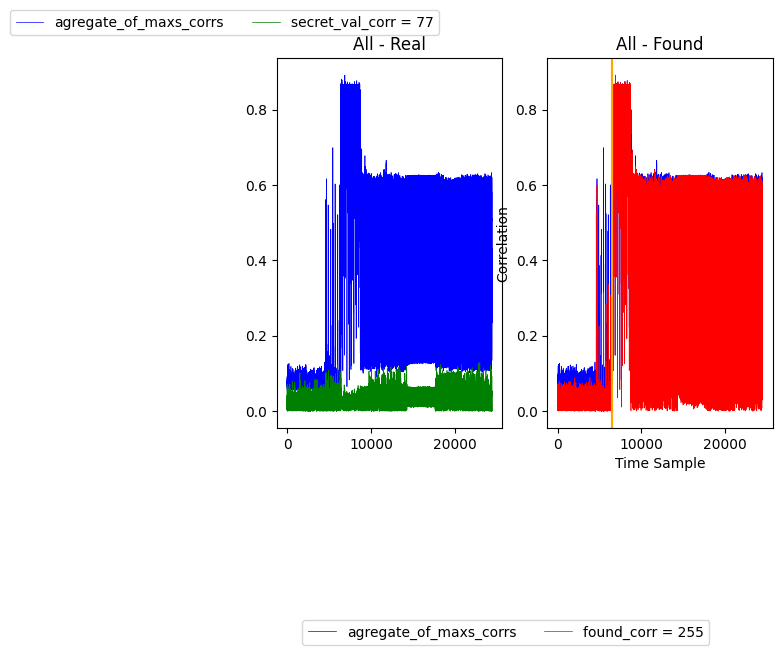

Hello 76
In range 6511 - 24429
 Found the soonest secret value is 255, at the time sample 6521, with correlation secret_corr = 0.870


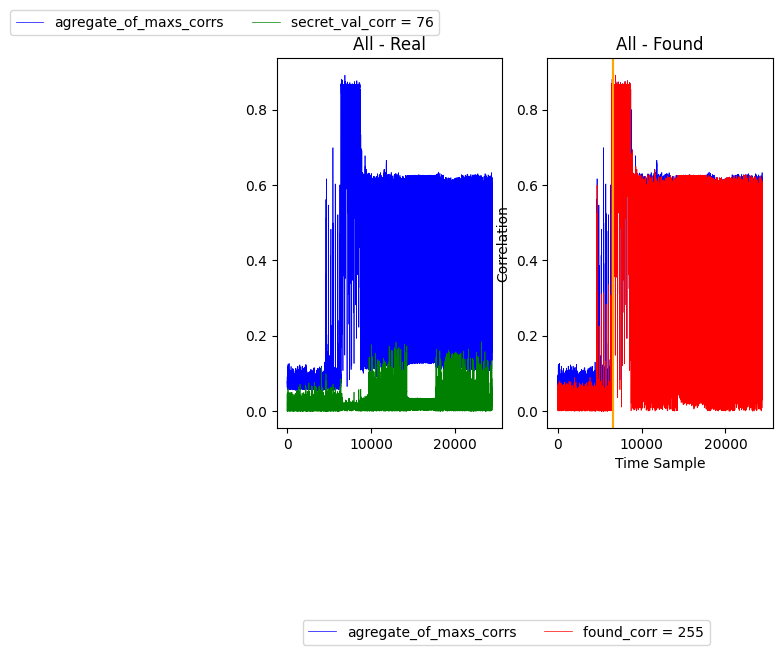

Hello 52
In range 6537 - 24429
 Found the soonest secret value is 255, at the time sample 6553, with correlation secret_corr = 0.878


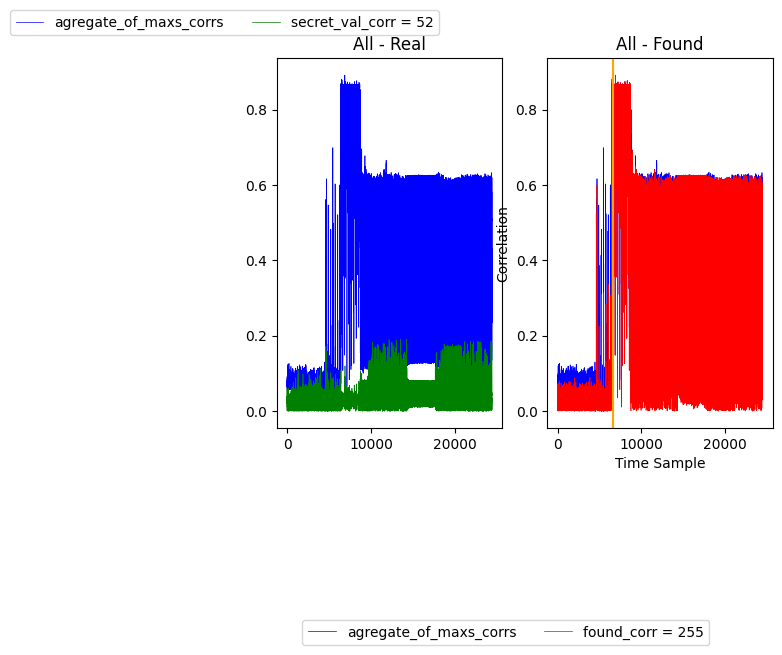

Hello 20
In range 6578 - 24429
 Found the soonest secret value is 255, at the time sample 6602, with correlation secret_corr = 0.865


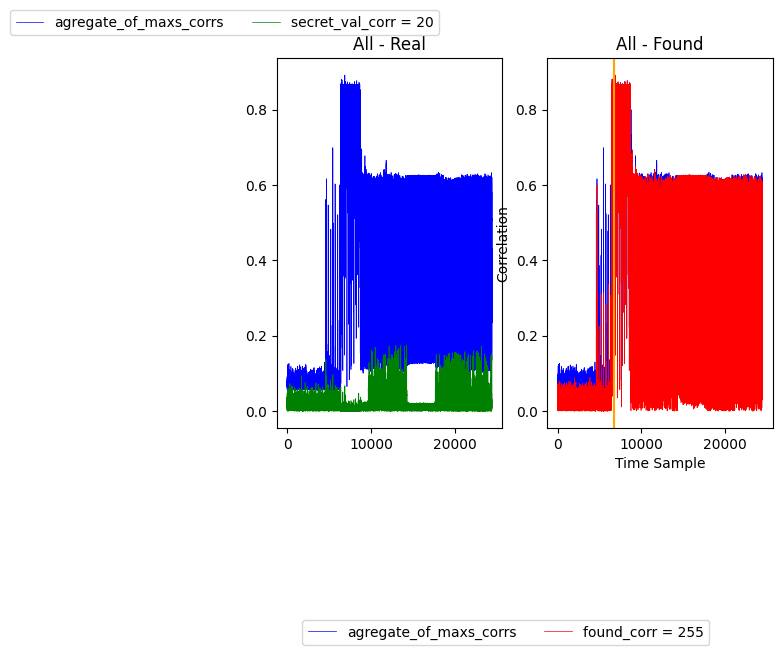

Hello 228
In range 6744 - 24429
 Found the soonest secret value is 255, at the time sample 6886, with correlation secret_corr = 0.891


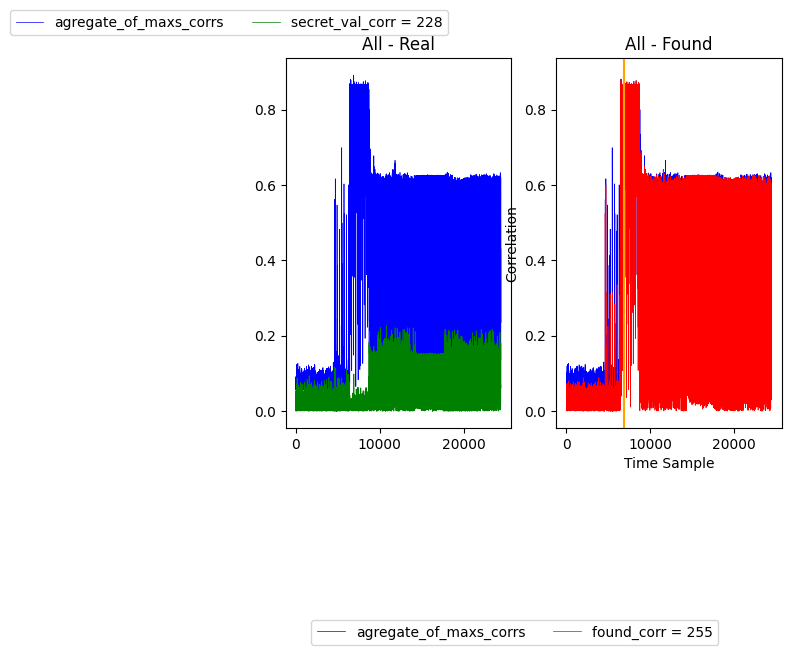

Hello 240
In range 6905 - 24429
 Found the soonest secret value is 255, at the time sample 6925, with correlation secret_corr = 0.875


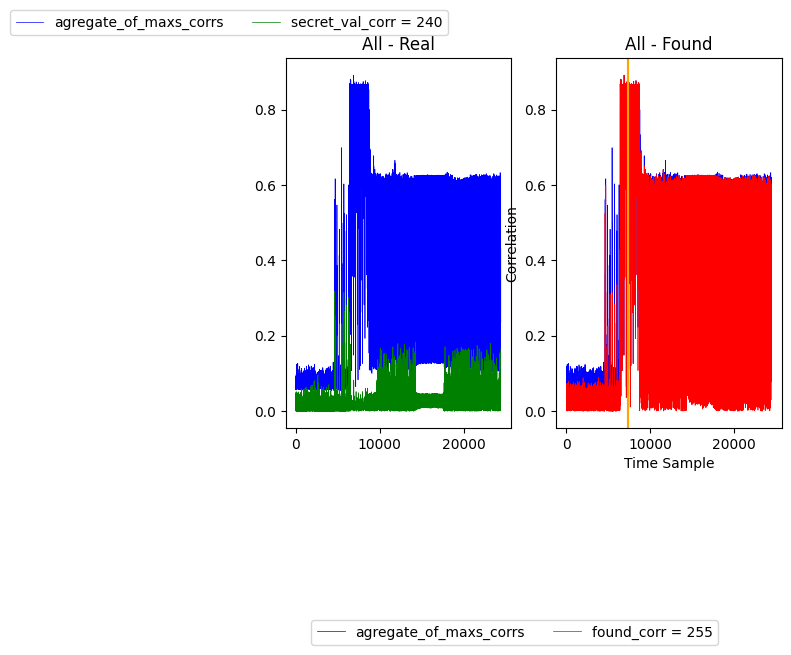

Hello 0
In range 7340 - 24429
 Found the soonest secret value is 255, at the time sample 7755, with correlation secret_corr = 0.869


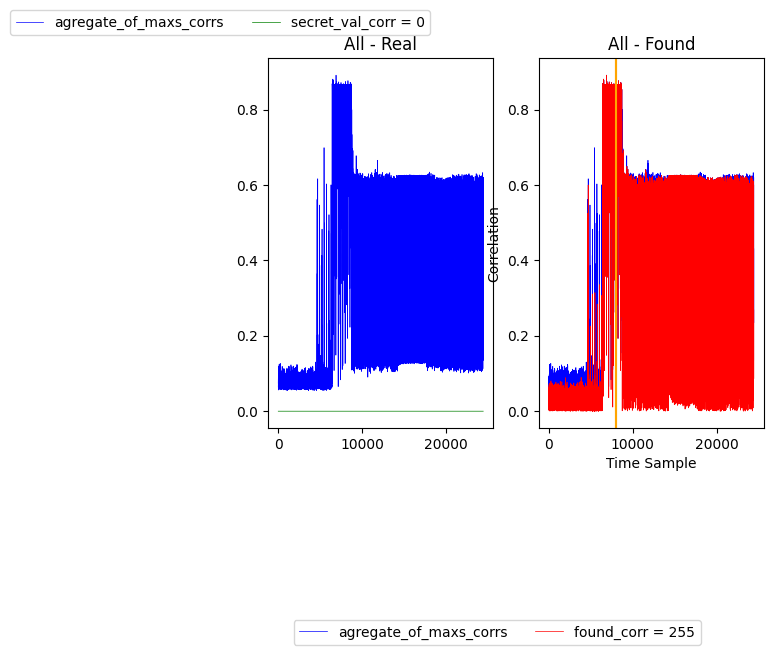

Hello 116
In range 8030 - 24429
 Found the soonest secret value is 255, at the time sample 8306, with correlation secret_corr = 0.877


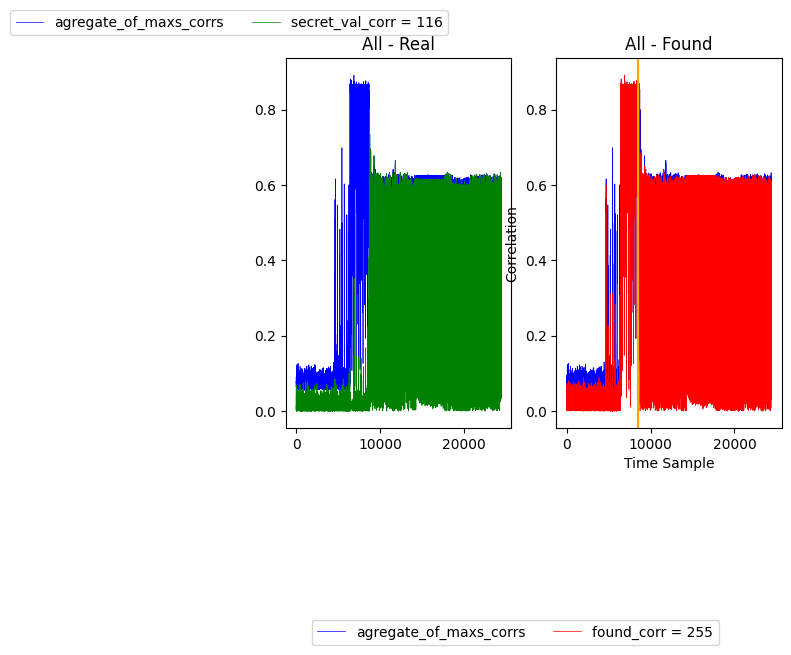

Hello 115
In range 8487 - 24429
 Found the soonest secret value is 255, at the time sample 8667, with correlation secret_corr = 0.869


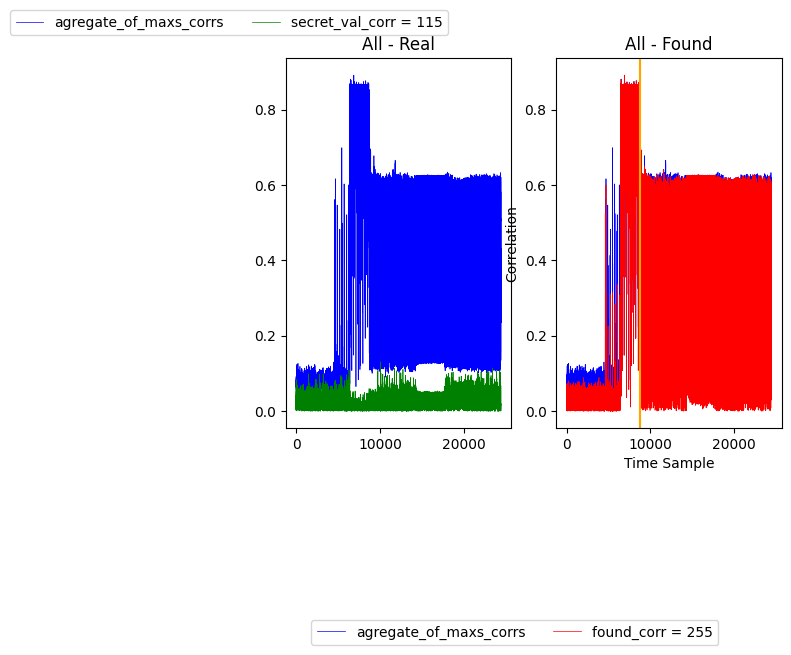

Hello 205
In range 8694 - 24429
 Found the soonest secret value is 116, at the time sample 8721, with correlation secret_corr = 0.713


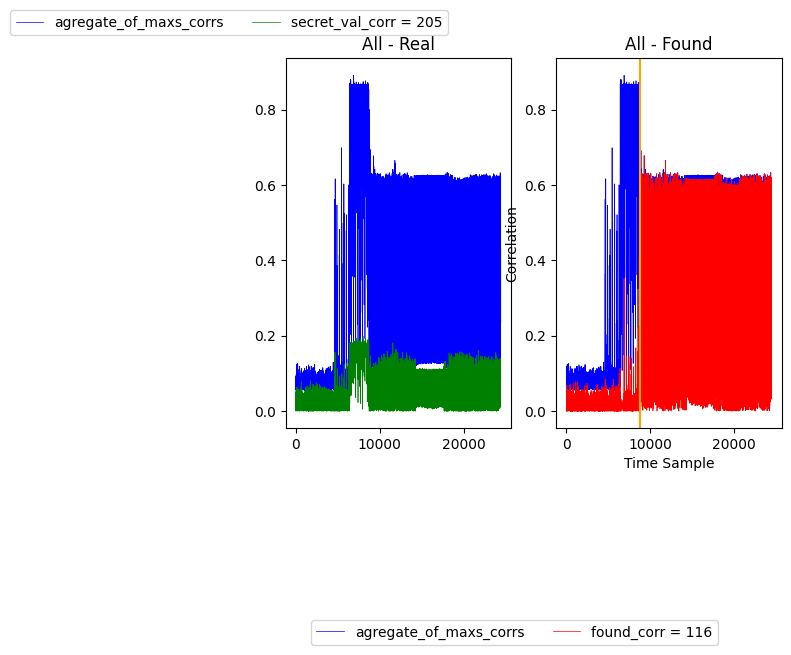

Hello 58
In range 8732 - 24429
 Found the soonest secret value is 116, at the time sample 8742, with correlation secret_corr = 0.656


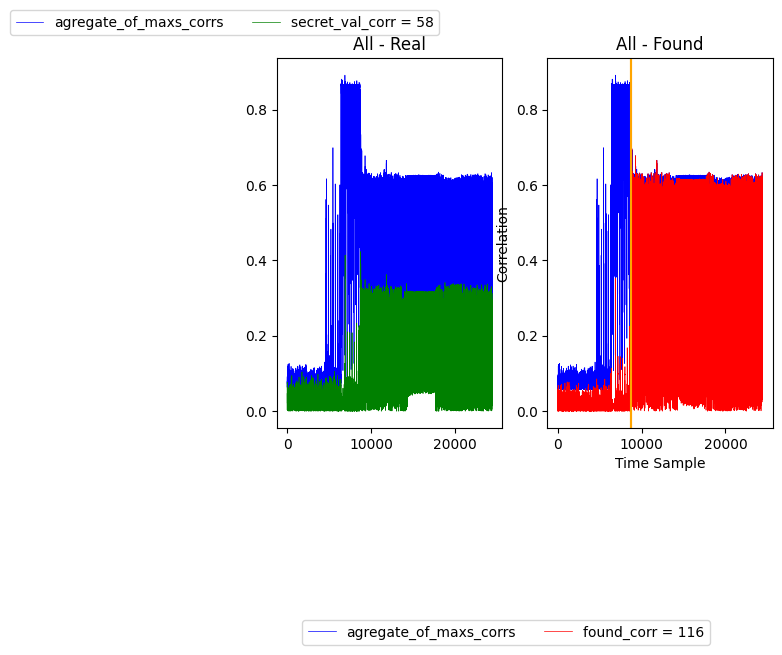

In [11]:
corr_map = abs(np.array(corr_Abs8[:,:]))
analyse_corr(corr_map=corr_map, weights=np.array(out)[3:-4], stop_num = 12, maxims_map = None,
                 _index = 0, peak_range = 0.3, show_info=True, mountain_half_dist = 5, level = 3, saveName=f'Abs8_{firmwareName}')

##### CPA, weight extraction - Abs32

Hello 255
Peak range: 0.3
24429
 Index of global max: 6886 and global_max_val: 0.8813559909849527


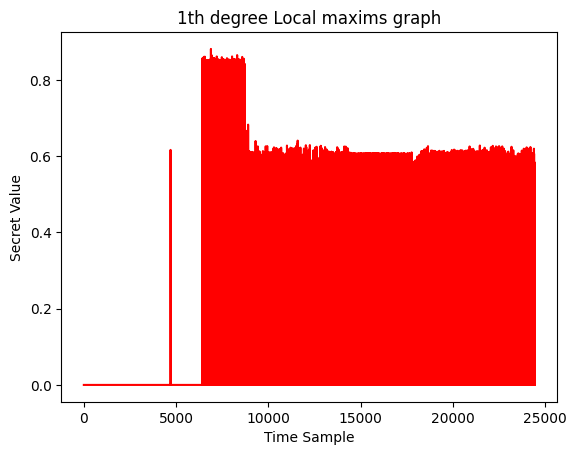

Number of uniques: 98
Number of local maxims: 2546
Uniquess: [81, 43, 1, 57, 37, 9, 161, 23, 69, 13, 33, 79, 135, 19, 21, 201, 63, 3, 15, 171, 207, 117, 73, 185, 119, 77, 59, 127, 153, 249, 165, 233, 213, 149, 253, 243, 125, 7, 89, 255, 137, 109, 93, 27, 83, 49, 237, 151, 55, 53, 221, 35, 97, 5, 51, 239, 219, 167, 65, 155, 189, 129, 241, 85, 87, 25, 61, 141, 205, 47, 71, 113, 111, 195, 99, 45, 223, 187, 197, 121, 107, 159, 75, 95, 31, 123, 29, 215, 103, 41, 235, 131, 11, 227, 39, 139, 17, 191]
Local maxims: [81, 43, 43, 1, 57, 37, 9, 9, 1, 161, 23, 69, 13, 33, 81, 43, 79, 161, 9, 135, 19, 1, 23, 43, 21, 9, 201, 1, 63, 69, 9, 3, 43, 161, 15, 63, 171, 207, 81, 37, 43, 81, 21, 117, 73, 81, 1, 185, 21, 119, 1, 23, 77, 3, 81, 73, 59, 1, 127, 3, 63, 77, 117, 77, 153, 1, 119, 1, 9, 9, 9, 249, 37, 165, 233, 9, 127, 1, 21, 135, 9, 213, 161, 59, 9, 153, 43, 117, 43, 233, 3, 3, 149, 9, 9, 3, 253, 43, 9, 243, 59, 119, 9, 81, 3, 9, 81, 127, 125, 79, 43, 153, 43, 153, 1, 81, 3, 15, 153, 7, 89, 255, 

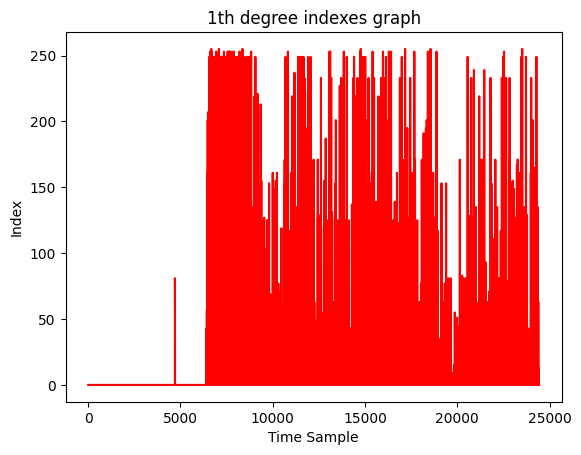

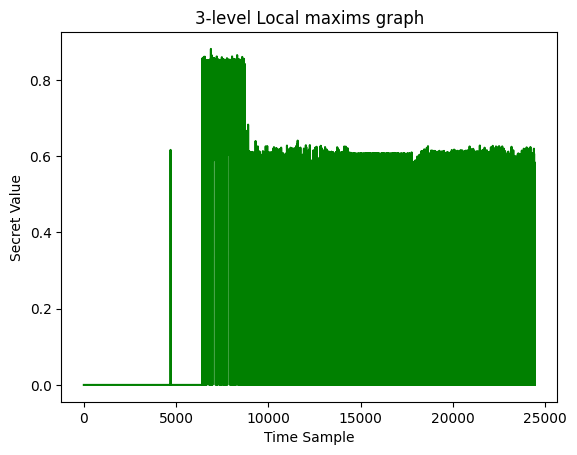

Number of uniques: 104
Number of local maxims: 4033
Uniquess: [81, 43, 9, 3, 77, 1, 57, 37, 119, 161, 23, 69, 13, 59, 33, 155, 233, 107, 79, 135, 19, 27, 63, 49, 221, 21, 201, 15, 73, 171, 207, 117, 125, 53, 5, 55, 185, 127, 61, 153, 249, 165, 111, 7, 219, 213, 51, 149, 121, 253, 243, 187, 99, 89, 255, 215, 137, 109, 239, 93, 83, 237, 151, 47, 35, 97, 167, 65, 189, 129, 241, 85, 25, 87, 143, 141, 205, 179, 139, 71, 39, 113, 195, 45, 223, 197, 159, 75, 103, 217, 95, 131, 31, 123, 29, 169, 231, 41, 235, 177, 11, 227, 17, 191]
Local maxims: [81, 43, 9, 43, 3, 77, 1, 1, 57, 37, 119, 9, 9, 1, 161, 23, 9, 69, 13, 59, 33, 155, 77, 1, 81, 43, 233, 107, 79, 161, 3, 9, 135, 19, 9, 27, 1, 135, 13, 23, 33, 63, 49, 43, 221, 21, 9, 9, 9, 201, 1, 63, 69, 9, 3, 43, 161, 15, 23, 73, 3, 9, 63, 201, 171, 207, 81, 117, 37, 43, 63, 9, 81, 21, 125, 117, 59, 81, 21, 81, 59, 161, 53, 5, 1, 55, 73, 81, 1, 185, 53, 5, 21, 119, 43, 1, 23, 77, 3, 9, 125, 59, 233, 81, 73, 59, 1, 23, 59, 73, 127, 3, 63, 9, 63, 77, 

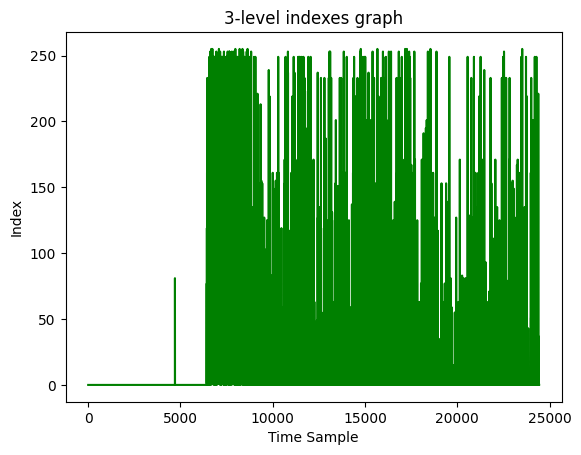

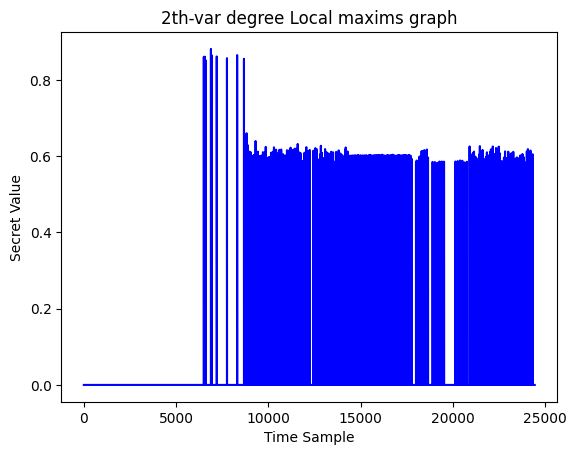

Number of uniques: 57
Number of local maxims: 329
Uniquess: [117, 1, 3, 127, 195, 79, 253, 43, 9, 7, 51, 5, 21, 213, 155, 59, 23, 87, 37, 83, 125, 63, 149, 161, 53, 33, 171, 55, 69, 77, 219, 249, 135, 35, 97, 107, 233, 13, 153, 119, 15, 49, 85, 89, 27, 139, 137, 81, 25, 31, 57, 239, 73, 45, 167, 111, 165]
Local maxims: [117, 1, 3, 127, 3, 1, 195, 195, 1, 3, 79, 253, 43, 9, 1, 7, 3, 51, 3, 3, 3, 9, 9, 1, 5, 3, 21, 1, 213, 155, 59, 23, 59, 87, 37, 3, 83, 43, 3, 125, 9, 1, 1, 63, 5, 9, 149, 7, 161, 53, 1, 1, 33, 1, 59, 171, 9, 5, 53, 55, 43, 117, 9, 87, 69, 161, 77, 219, 43, 3, 83, 63, 59, 1, 9, 77, 9, 249, 53, 135, 69, 3, 161, 43, 9, 35, 59, 1, 97, 171, 195, 107, 1, 233, 13, 153, 23, 43, 1, 117, 53, 1, 9, 117, 119, 9, 37, 155, 43, 3, 69, 125, 59, 1, 127, 233, 15, 55, 49, 85, 89, 1, 5, 27, 3, 9, 9, 139, 3, 5, 161, 3, 253, 1, 5, 249, 77, 1, 43, 137, 1, 43, 3, 7, 43, 117, 3, 7, 9, 9, 117, 3, 63, 171, 43, 161, 1, 63, 69, 43, 9, 3, 1, 9, 49, 1, 1, 23, 51, 233, 1, 1, 9, 9, 9, 3, 1, 23, 13, 3, 

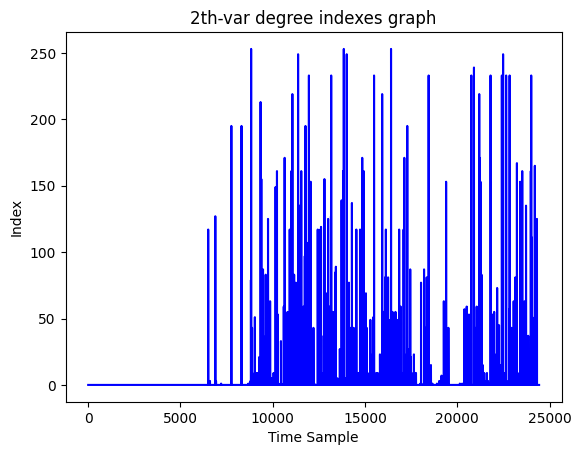

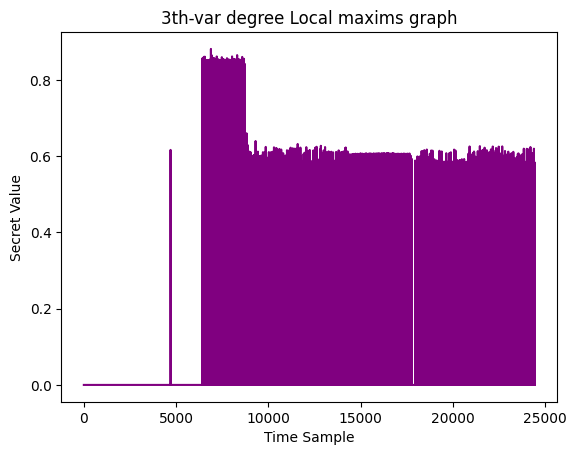

Number of uniques: 89
Number of local maxims: 1655
Uniquess: [81, 1, 57, 9, 161, 69, 33, 79, 135, 23, 201, 63, 3, 43, 171, 207, 37, 117, 21, 77, 73, 59, 127, 153, 249, 165, 149, 253, 243, 119, 15, 89, 255, 19, 109, 233, 83, 237, 151, 55, 27, 221, 7, 53, 125, 97, 51, 35, 239, 167, 65, 155, 189, 129, 241, 219, 137, 87, 13, 25, 71, 113, 111, 195, 61, 99, 45, 223, 47, 121, 107, 159, 49, 75, 95, 31, 93, 123, 29, 5, 131, 213, 103, 187, 85, 11, 227, 39, 139]
Local maxims: [81, 1, 57, 9, 1, 161, 69, 33, 81, 79, 9, 135, 1, 23, 9, 201, 1, 63, 69, 9, 3, 43, 161, 63, 171, 207, 81, 37, 81, 117, 81, 1, 21, 1, 23, 77, 3, 81, 73, 59, 127, 63, 77, 153, 1, 1, 9, 9, 9, 249, 37, 165, 9, 1, 9, 161, 59, 9, 43, 43, 3, 149, 9, 253, 243, 119, 9, 81, 9, 79, 153, 43, 1, 81, 15, 89, 255, 9, 19, 9, 63, 59, 33, 9, 15, 81, 201, 43, 63, 1, 73, 9, 1, 109, 15, 37, 233, 3, 9, 63, 1, 83, 237, 81, 9, 15, 23, 151, 55, 27, 9, 43, 221, 7, 73, 15, 1, 1, 9, 53, 135, 9, 9, 15, 1, 55, 9, 59, 125, 3, 97, 3, 43, 27, 15, 9, 27, 51,

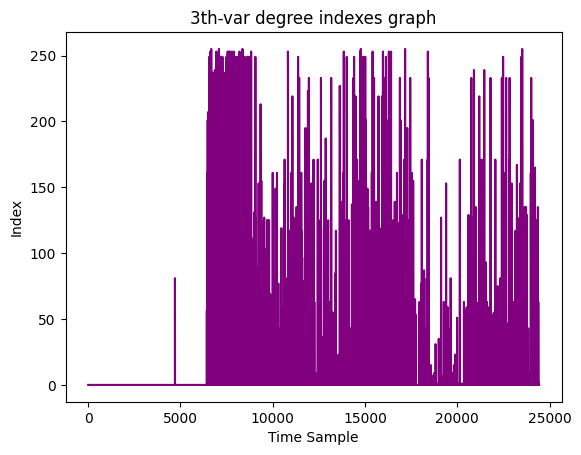

In range 0 - 24429
 Found the soonest secret value is 117, at the time sample 6501, with correlation secret_corr = 0.861


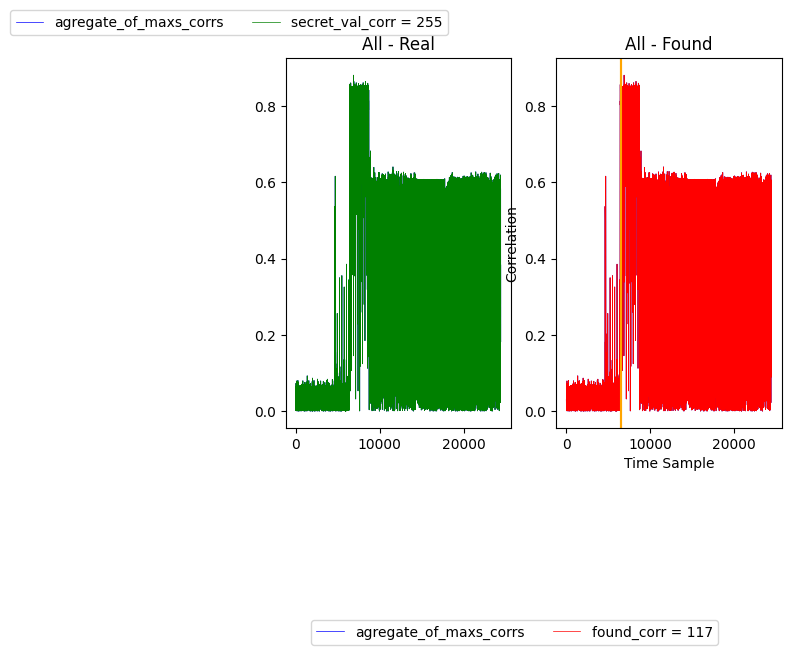

Hello 77
In range 6527 - 24429
 Found the soonest secret value is 1, at the time sample 6553, with correlation secret_corr = 0.861


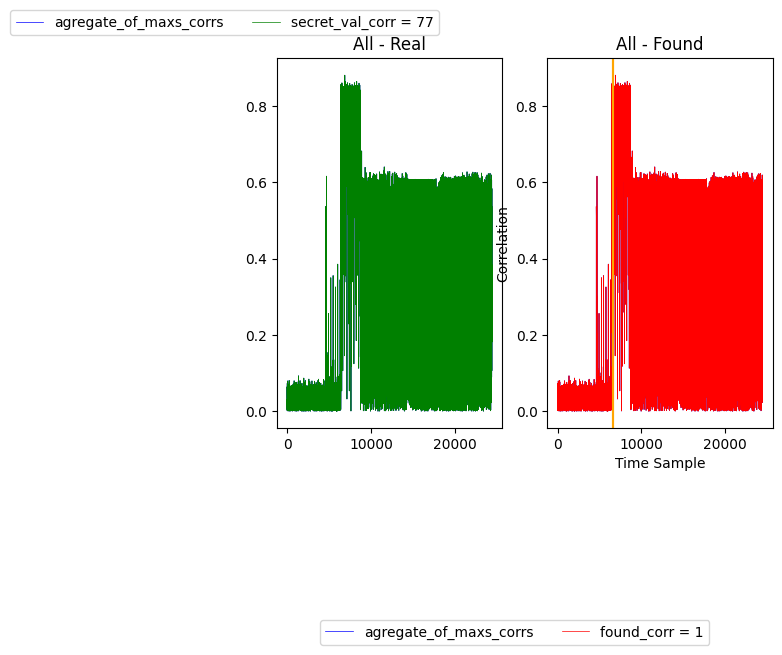

Hello 76
In range 6575 - 24429
 Found the soonest secret value is 3, at the time sample 6597, with correlation secret_corr = 0.852


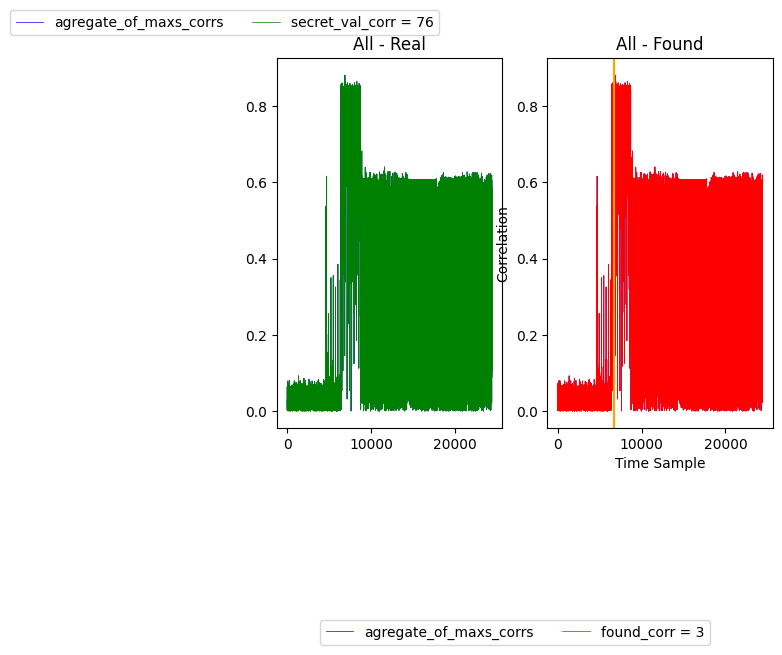

Hello 52
In range 6742 - 24429
 Found the soonest secret value is 127, at the time sample 6886, with correlation secret_corr = 0.881


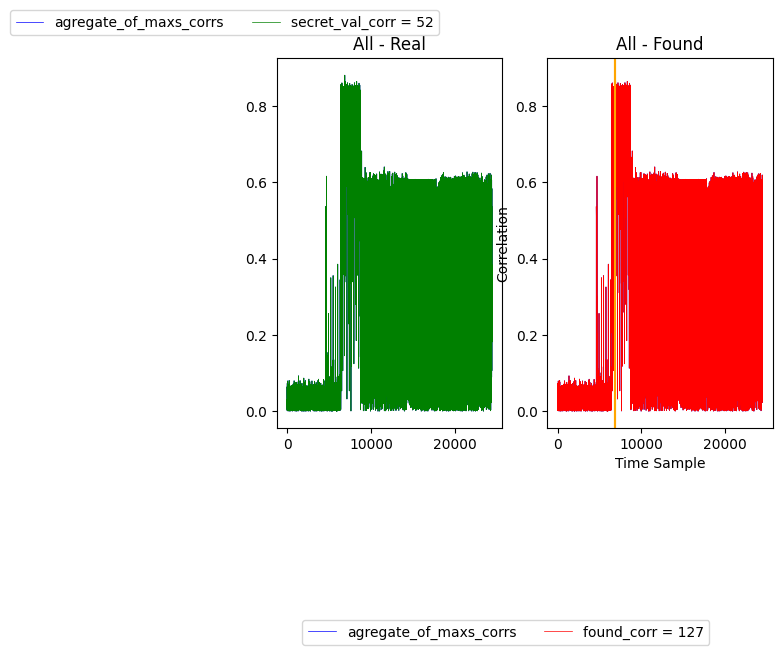

Hello 20
In range 6905 - 24429
 Found the soonest secret value is 3, at the time sample 6925, with correlation secret_corr = 0.865


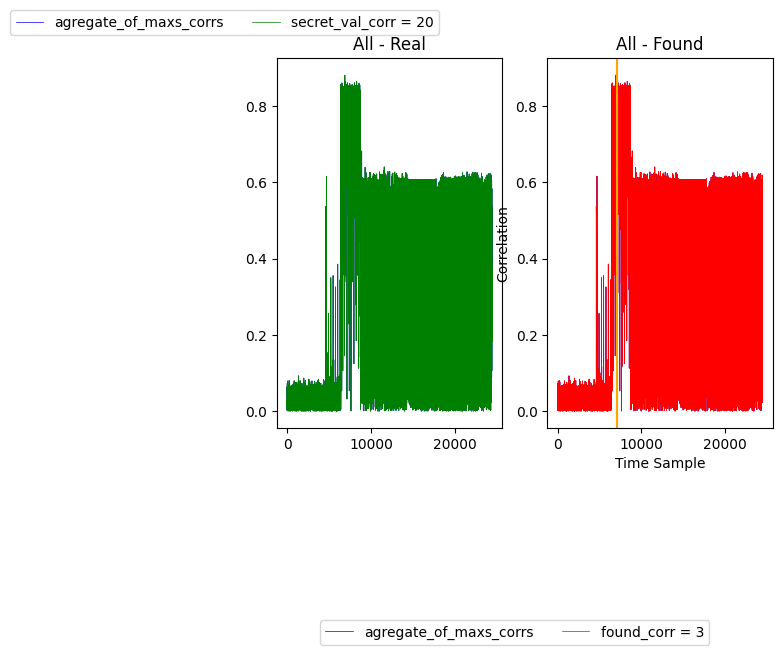

Hello 228
In range 7063 - 24429
 Found the soonest secret value is 1, at the time sample 7201, with correlation secret_corr = 0.862


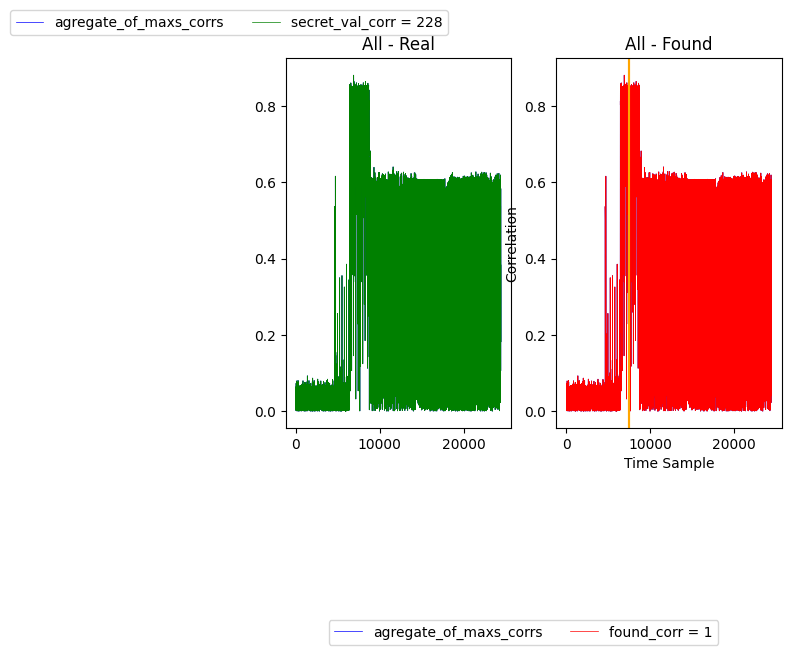

Hello 240
In range 7478 - 24429
 Found the soonest secret value is 195, at the time sample 7755, with correlation secret_corr = 0.857


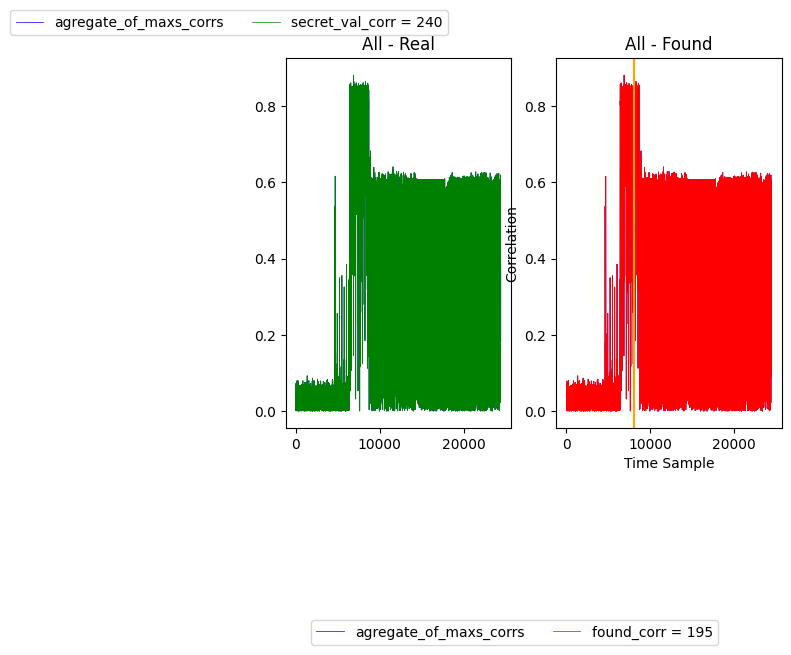

Hello 0
In range 8030 - 24429
 Found the soonest secret value is 195, at the time sample 8306, with correlation secret_corr = 0.865


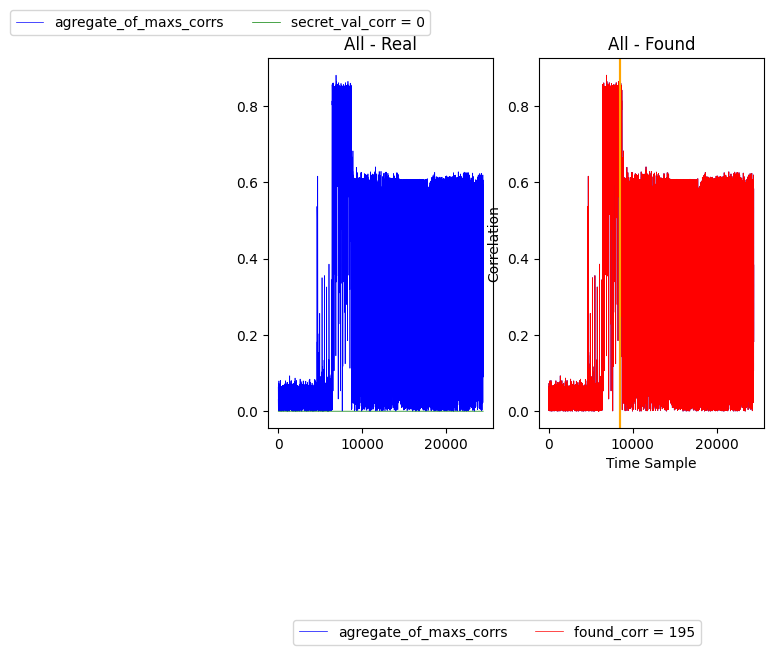

Hello 116
In range 8491 - 24429
 Found the soonest secret value is 1, at the time sample 8676, with correlation secret_corr = 0.855


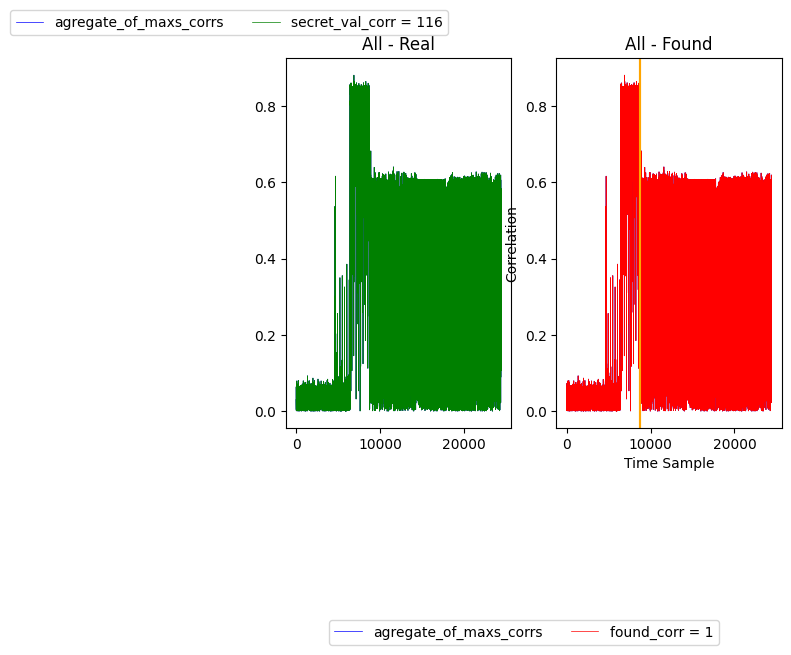

Hello 115
In range 8737 - 24429
 Found the soonest secret value is 3, at the time sample 8797, with correlation secret_corr = 0.593


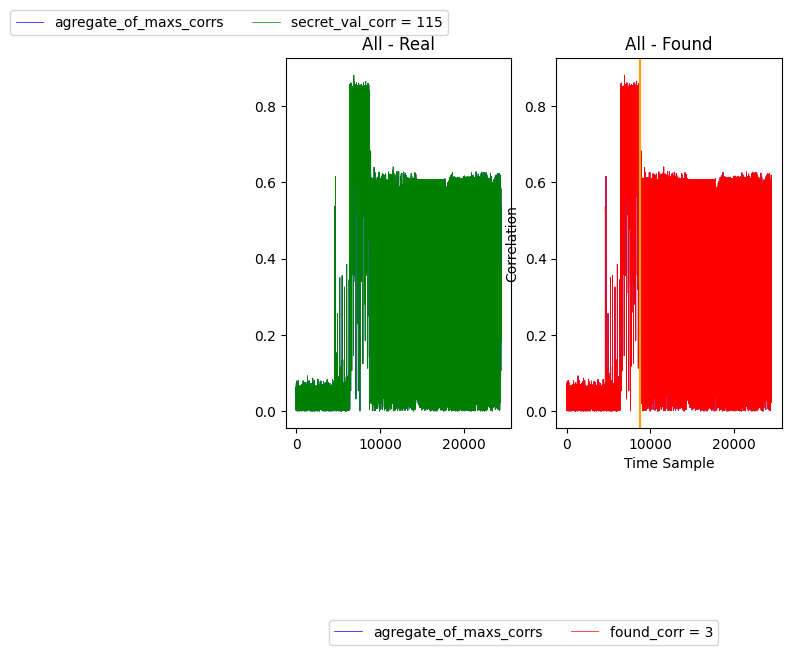

Hello 205
In range 8806 - 24429
 Found the soonest secret value is 79, at the time sample 8815, with correlation secret_corr = 0.660


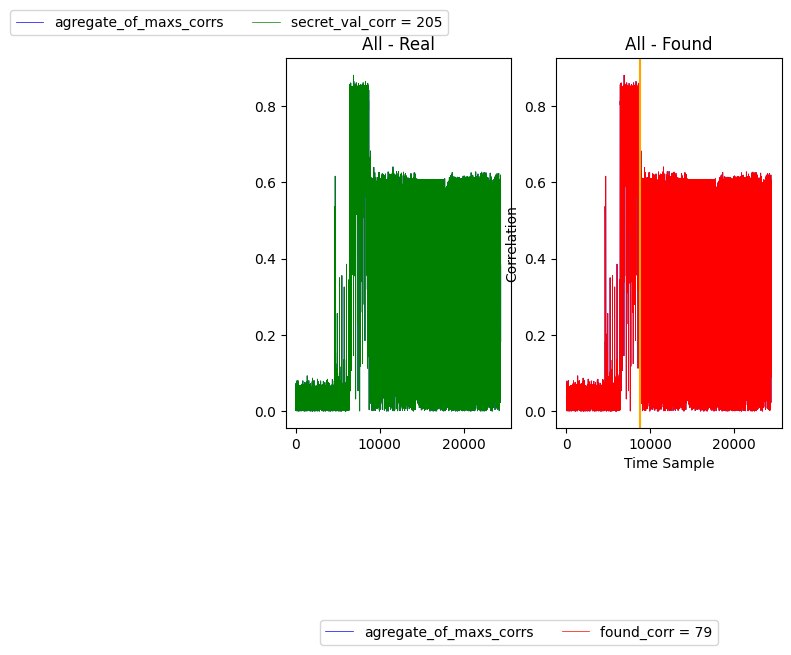

Hello 58
In range 8821 - 24429
 Found the soonest secret value is 253, at the time sample 8827, with correlation secret_corr = 0.635


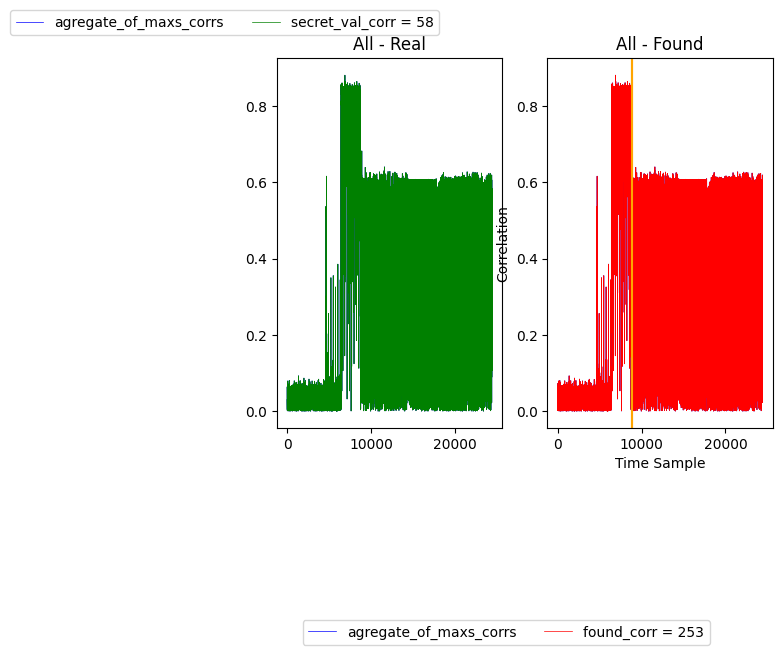

In [12]:
corr_map = abs(np.array(corr_Abs32[:,:]))
analyse_corr(corr_map=corr_map, weights=np.array(out)[3:-4], stop_num = 12, maxims_map = None,
                 _index = 0, peak_range = 0.3, show_info=True, mountain_half_dist = 5, level = 3, saveName=f'Abs32_{firmwareName}')

##### CPA, weight extraction - HW32

Hello 255
Peak range: 0.3
24429
 Index of global max: 21853 and global_max_val: 0.9120329726707841


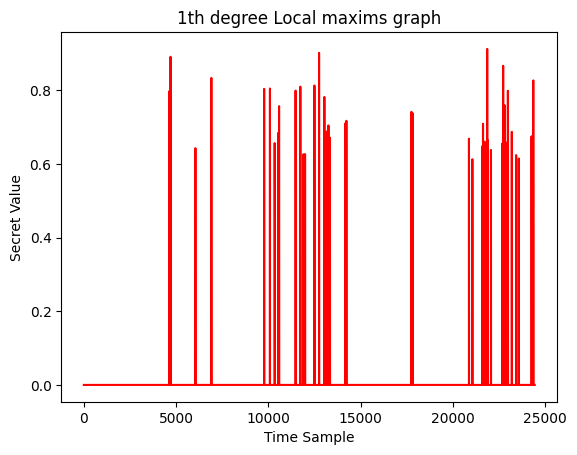

Number of uniques: 3
Number of local maxims: 60
Uniquess: [1, 255, 29]
Local maxims: [1, 1, 1, 255, 1, 1, 1, 1, 29, 29, 29, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255]


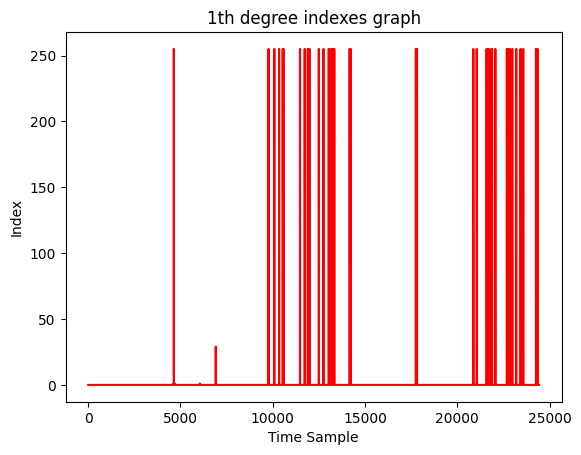

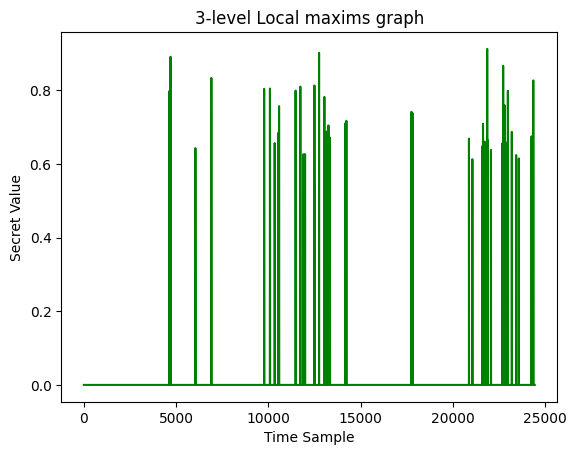

Number of uniques: 3
Number of local maxims: 74
Uniquess: [1, 255, 29]
Local maxims: [1, 1, 1, 255, 1, 1, 1, 1, 1, 29, 29, 29, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255]


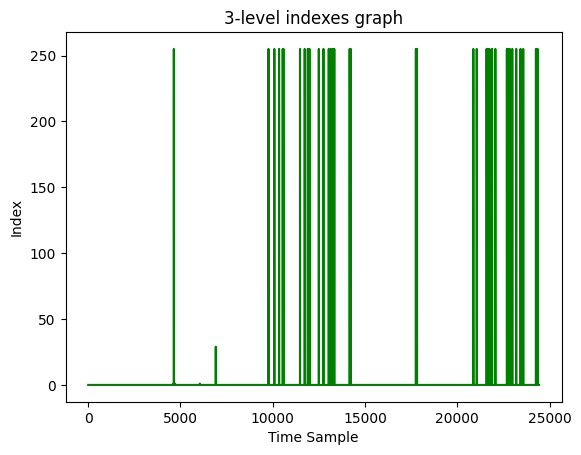

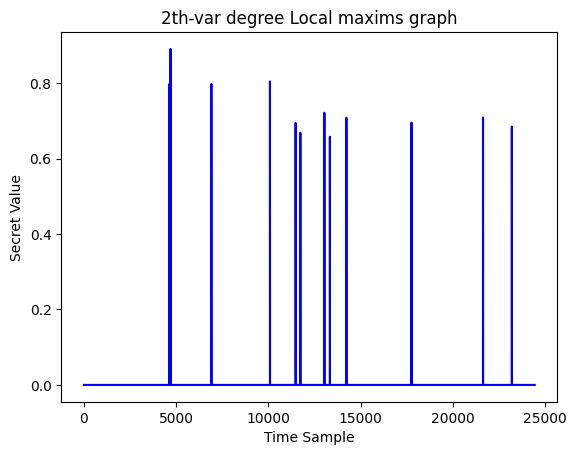

Number of uniques: 3
Number of local maxims: 12
Uniquess: [1, 29, 255]
Local maxims: [1, 1, 29, 255, 255, 255, 255, 255, 255, 255, 255, 255]


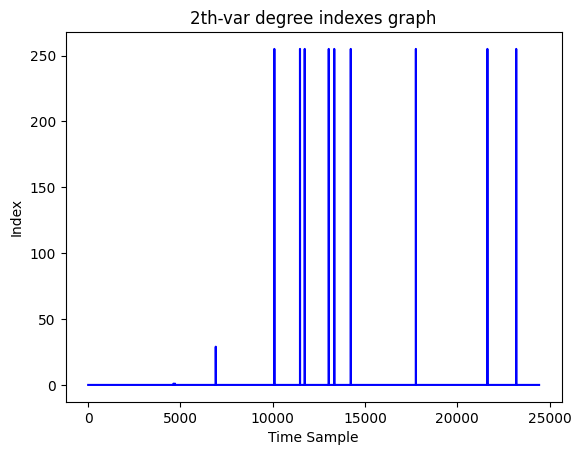

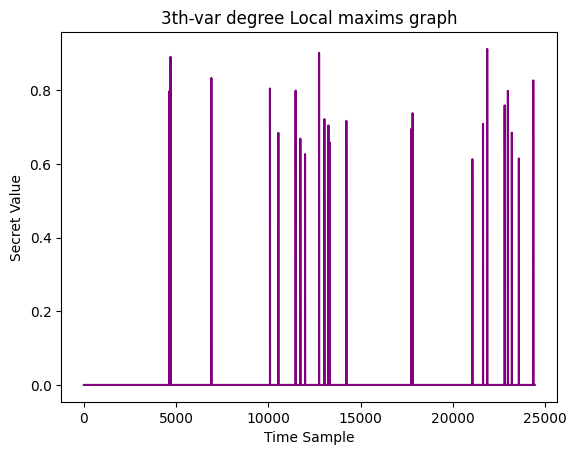

Number of uniques: 3
Number of local maxims: 30
Uniquess: [1, 29, 255]
Local maxims: [1, 1, 1, 1, 29, 29, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255]


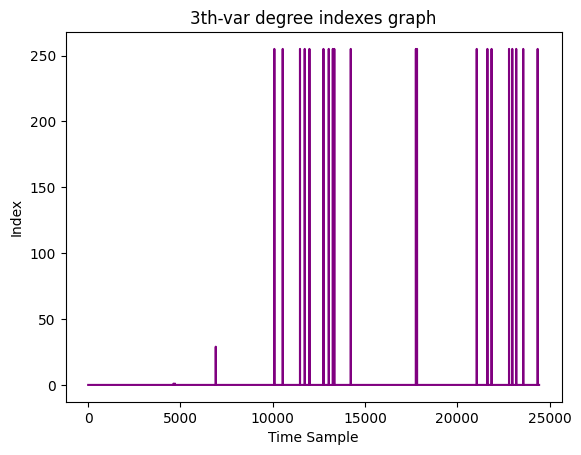

In range 0 - 24429
 Found the soonest secret value is 1, at the time sample 4625, with correlation secret_corr = 0.797


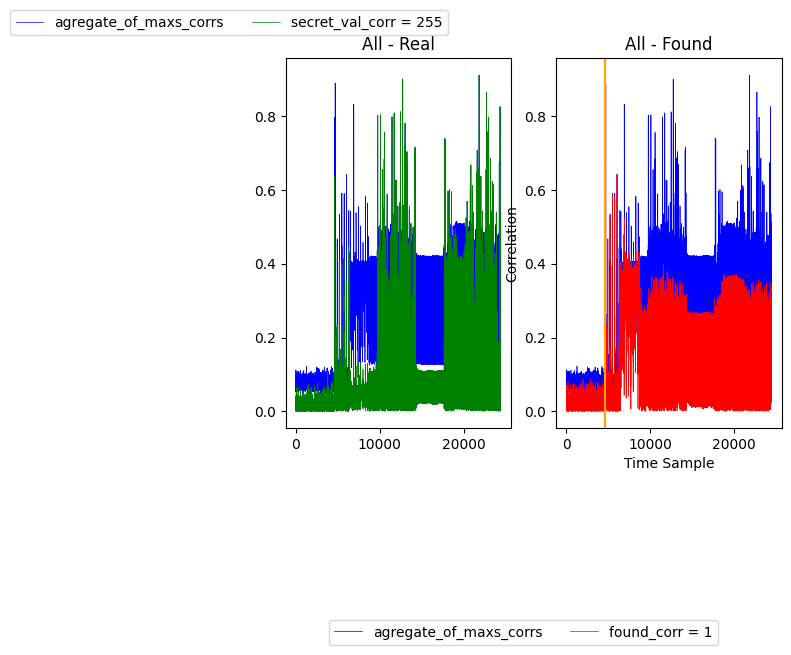

Hello 77
In range 4662 - 24429
 Found the soonest secret value is 1, at the time sample 4699, with correlation secret_corr = 0.891


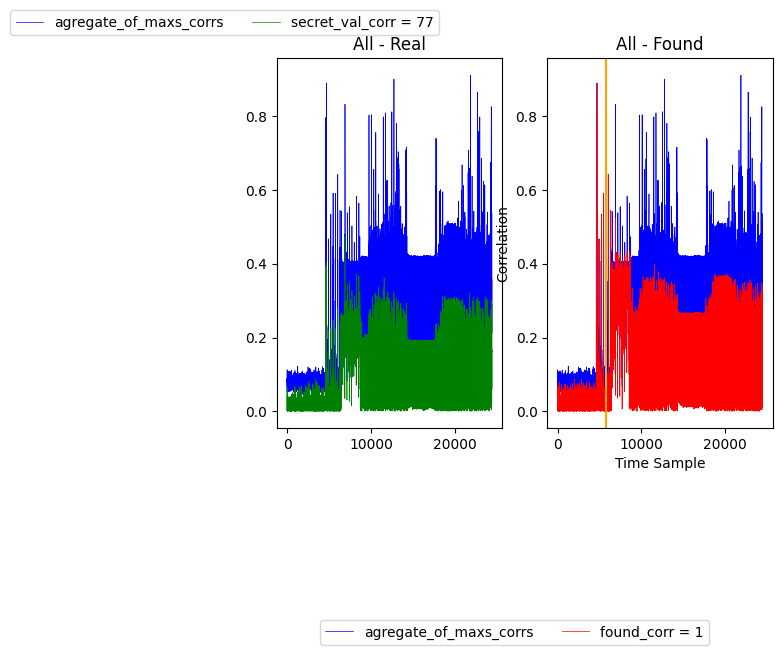

Hello 76
In range 5804 - 24429
 Found the soonest secret value is 29, at the time sample 6910, with correlation secret_corr = 0.798


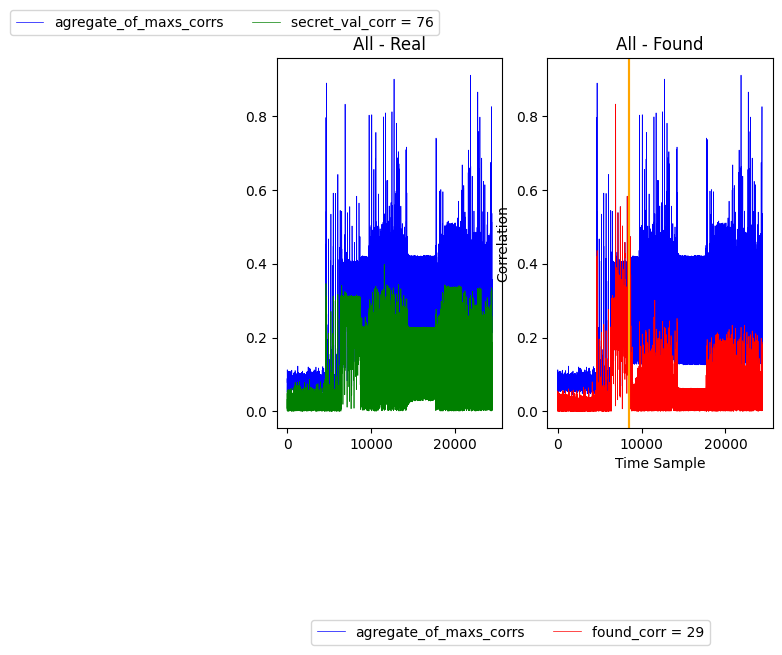

Hello 52
In range 8497 - 24429
 Found the soonest secret value is 255, at the time sample 10084, with correlation secret_corr = 0.805


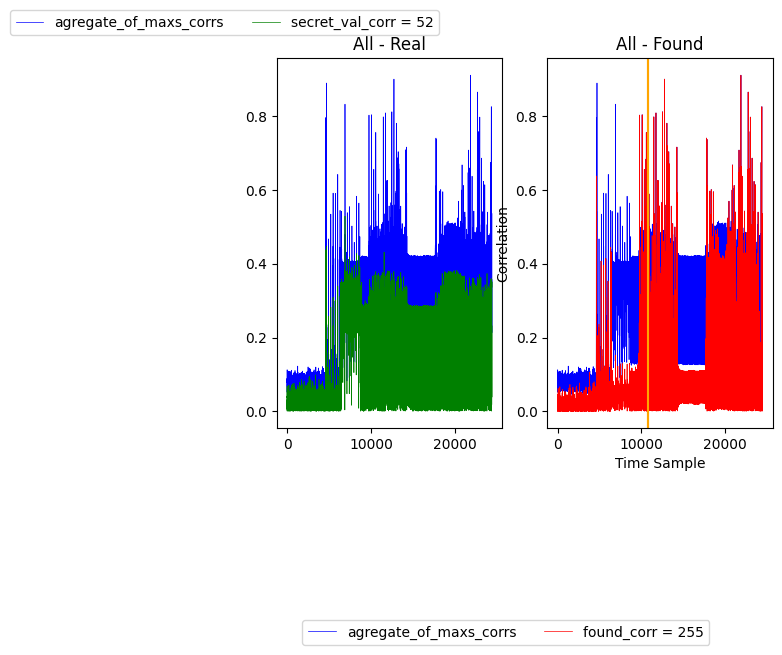

Hello 20
In range 10779 - 24429
 Found the soonest secret value is 255, at the time sample 11474, with correlation secret_corr = 0.694


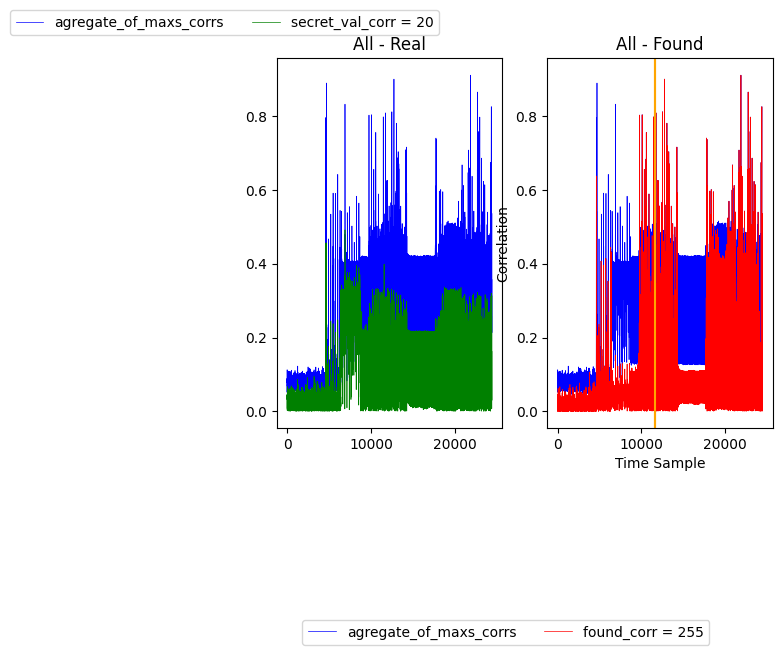

Hello 228
In range 11602 - 24429
 Found the soonest secret value is 255, at the time sample 11730, with correlation secret_corr = 0.668


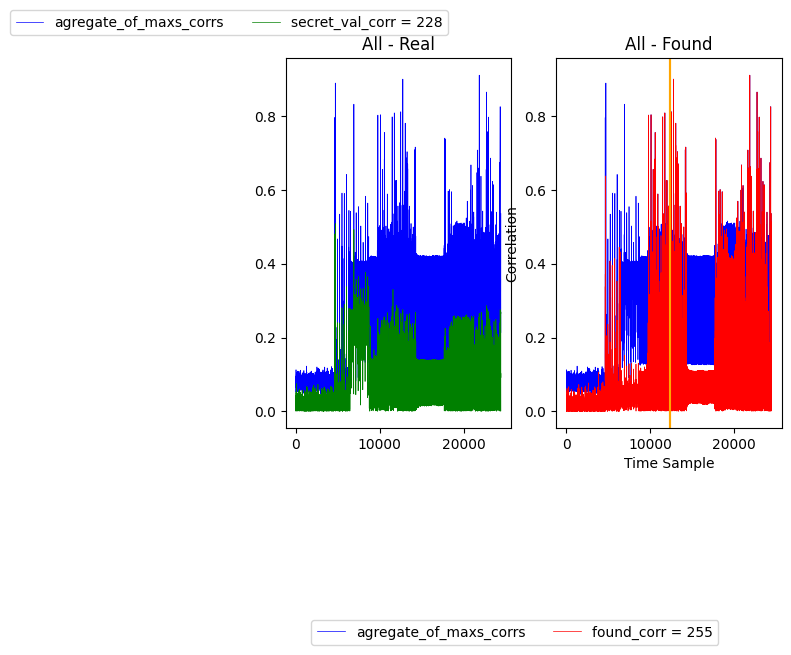

Hello 240
In range 12381 - 24429
 Found the soonest secret value is 255, at the time sample 13032, with correlation secret_corr = 0.722


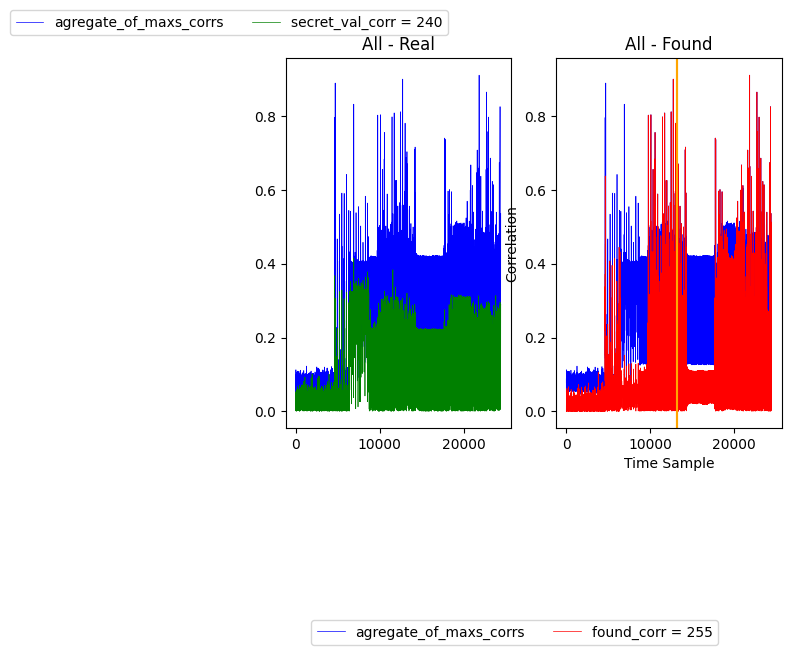

Hello 0
In range 13181 - 24429
 Found the soonest secret value is 255, at the time sample 13330, with correlation secret_corr = 0.658


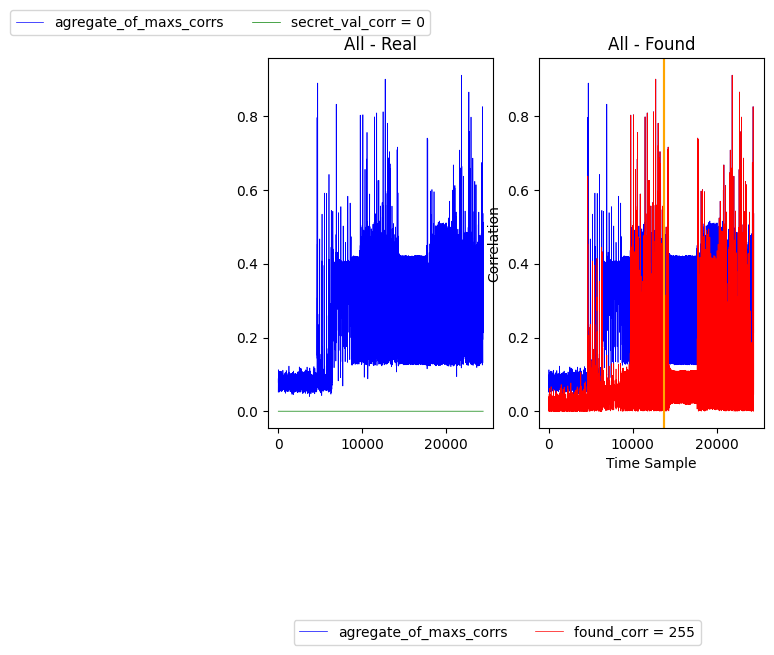

Hello 116
In range 13777 - 24429
 Found the soonest secret value is 255, at the time sample 14225, with correlation secret_corr = 0.708


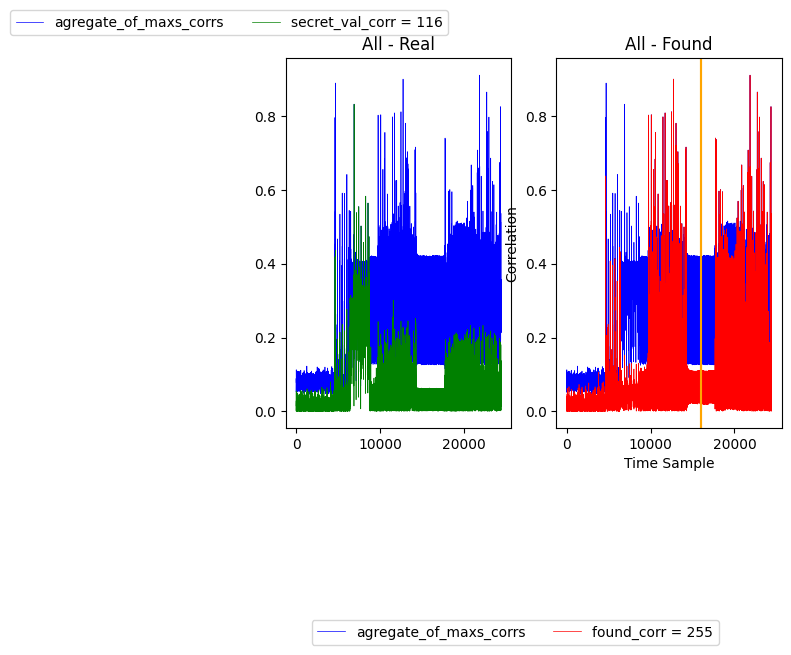

Hello 115
In range 15988 - 24429
 Found the soonest secret value is 255, at the time sample 17752, with correlation secret_corr = 0.695


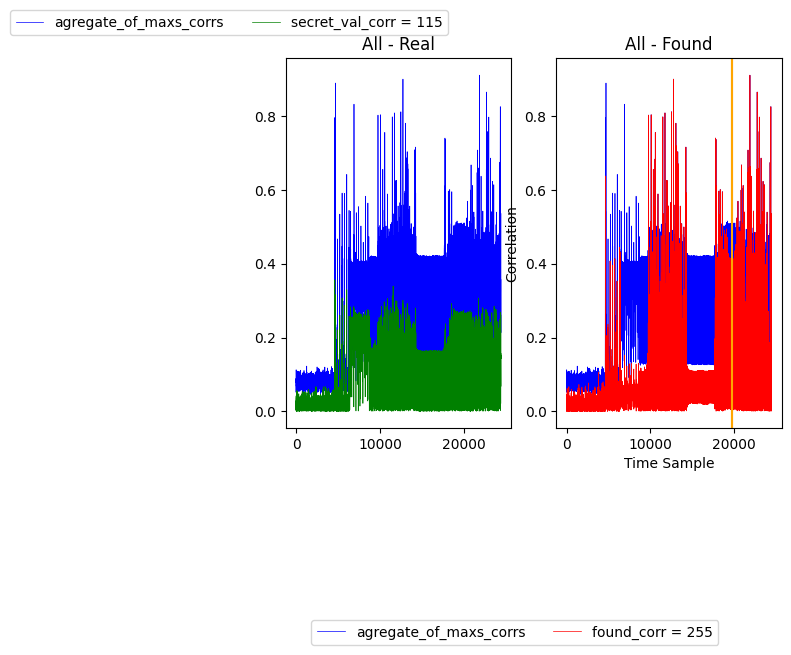

Hello 205
In range 19689 - 24429
 Found the soonest secret value is 255, at the time sample 21626, with correlation secret_corr = 0.709


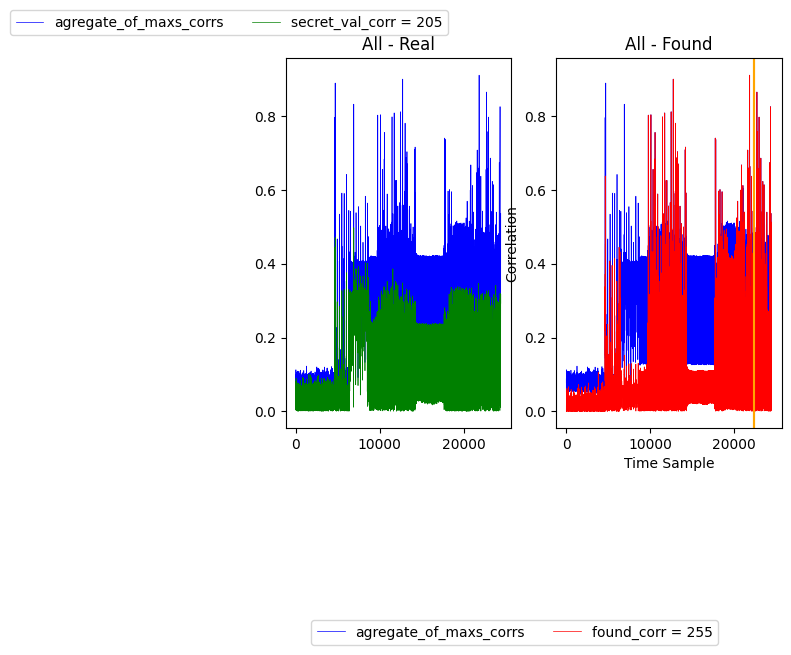

Hello 58
In range 22407 - 24429
 Found the soonest secret value is 255, at the time sample 23188, with correlation secret_corr = 0.685


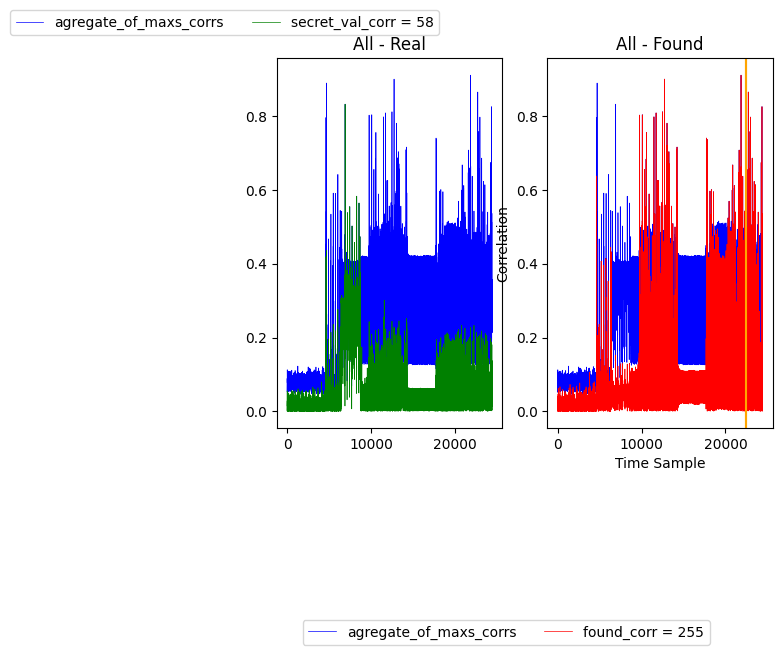

In [13]:
corr_map = abs(np.array(corr_HW32[:,:]))
analyse_corr(corr_map=corr_map, weights=np.array(out)[3:-4], stop_num = 12, maxims_map = None,
                 _index = 0, peak_range = 0.3, show_info=True, mountain_half_dist = 5, level = 3, saveName=f'HW32_{firmwareName}')

##### CPA, weight extraction - HW8

Hello 255
Peak range: 0.3
24429
 Index of global max: 4699 and global_max_val: 0.8907058355589554


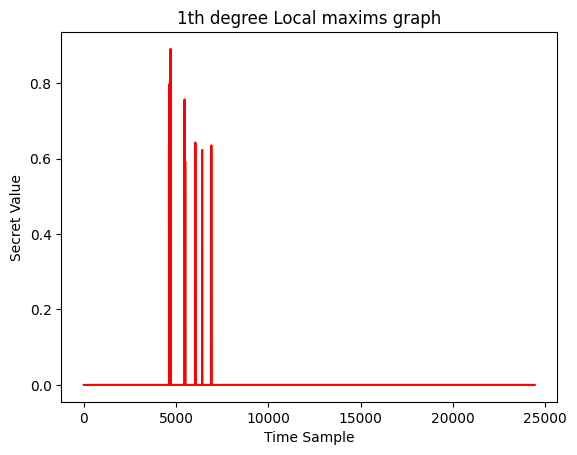

Number of uniques: 5
Number of local maxims: 15
Uniquess: [255, 2, 1, 192, 29]
Local maxims: [255, 2, 1, 1, 1, 1, 1, 192, 192, 192, 1, 1, 1, 255, 29]


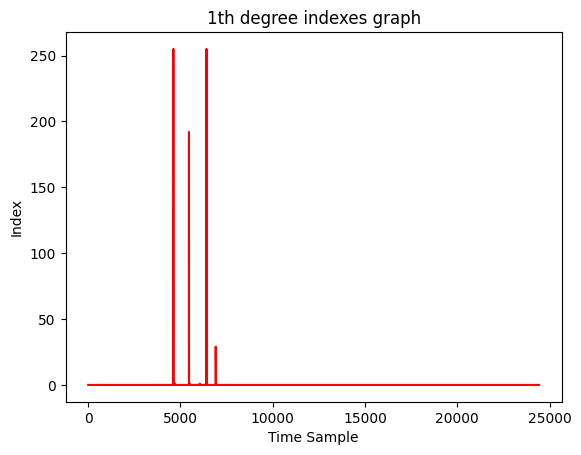

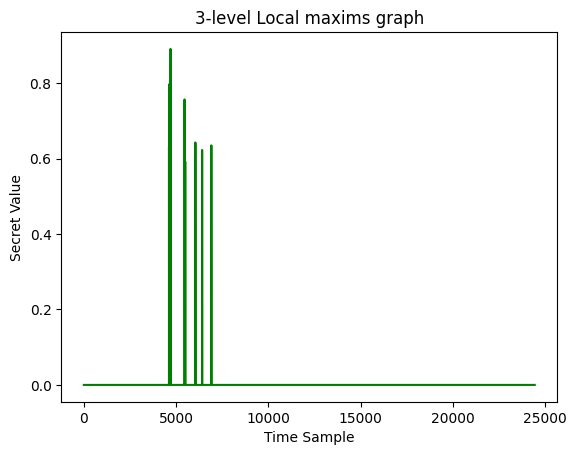

Number of uniques: 5
Number of local maxims: 17
Uniquess: [255, 2, 1, 192, 29]
Local maxims: [255, 255, 2, 1, 1, 1, 1, 1, 1, 192, 192, 192, 1, 1, 1, 255, 29]


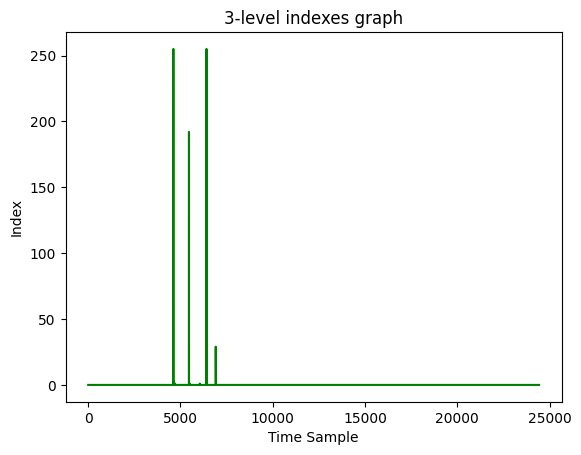

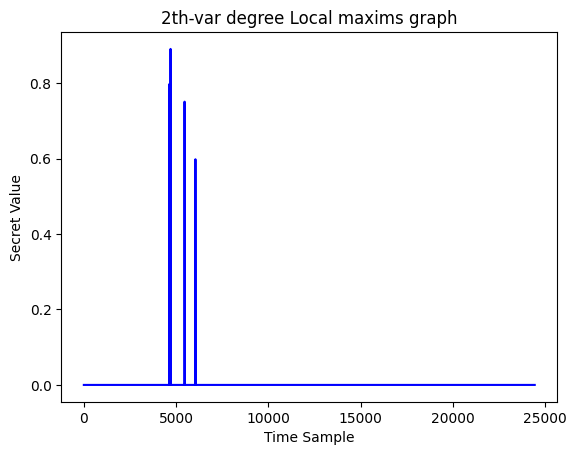

Number of uniques: 2
Number of local maxims: 4
Uniquess: [1, 192]
Local maxims: [1, 1, 192, 1]


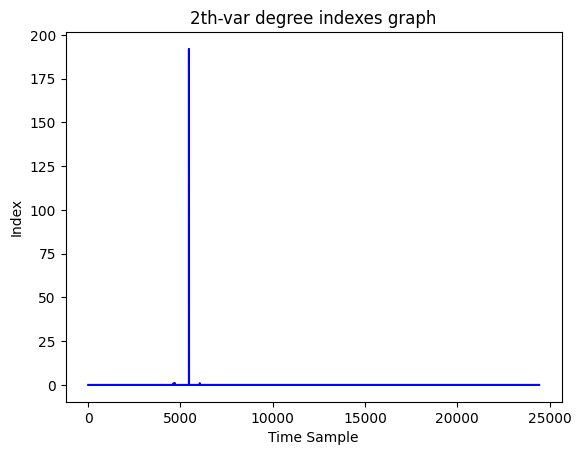

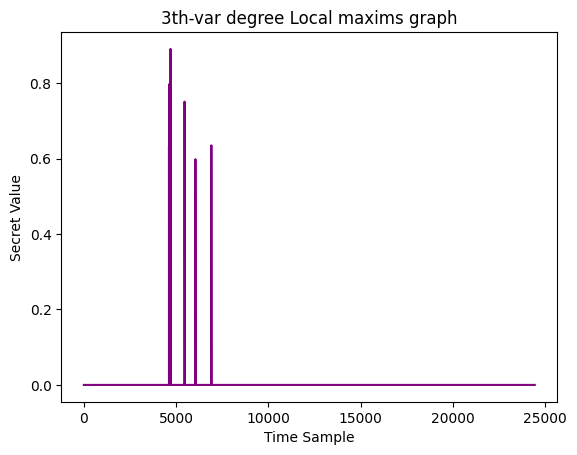

Number of uniques: 4
Number of local maxims: 8
Uniquess: [255, 1, 192, 29]
Local maxims: [255, 1, 1, 1, 1, 192, 1, 29]


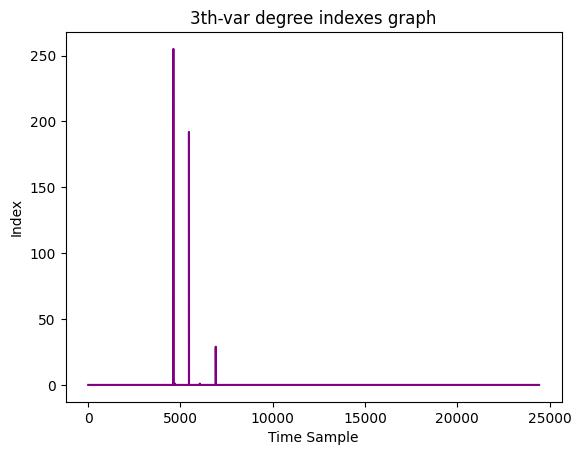

In range 0 - 24429
 Found the soonest secret value is 1, at the time sample 4625, with correlation secret_corr = 0.797


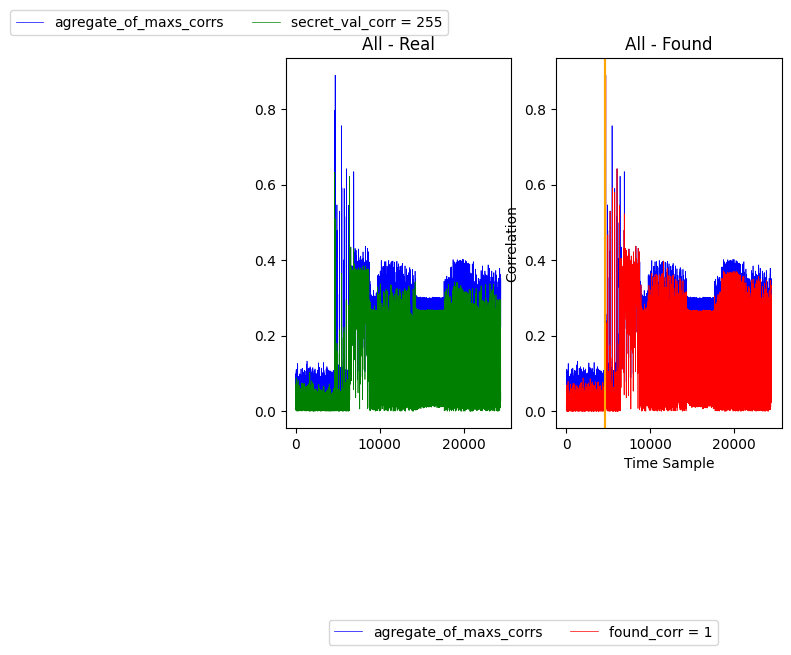

Hello 77
In range 4662 - 24429
 Found the soonest secret value is 1, at the time sample 4699, with correlation secret_corr = 0.891


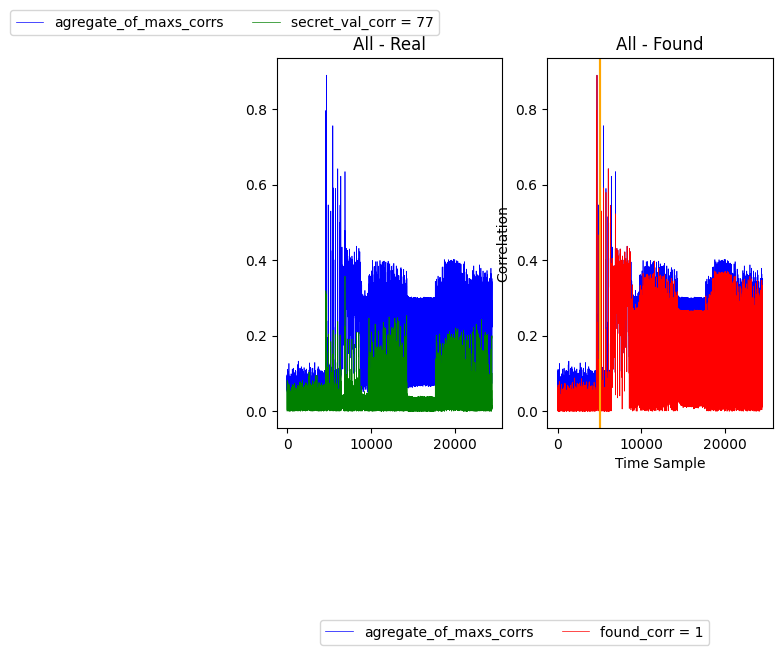

Hello 76
In range 5078 - 24429
 Found the soonest secret value is 192, at the time sample 5458, with correlation secret_corr = 0.751


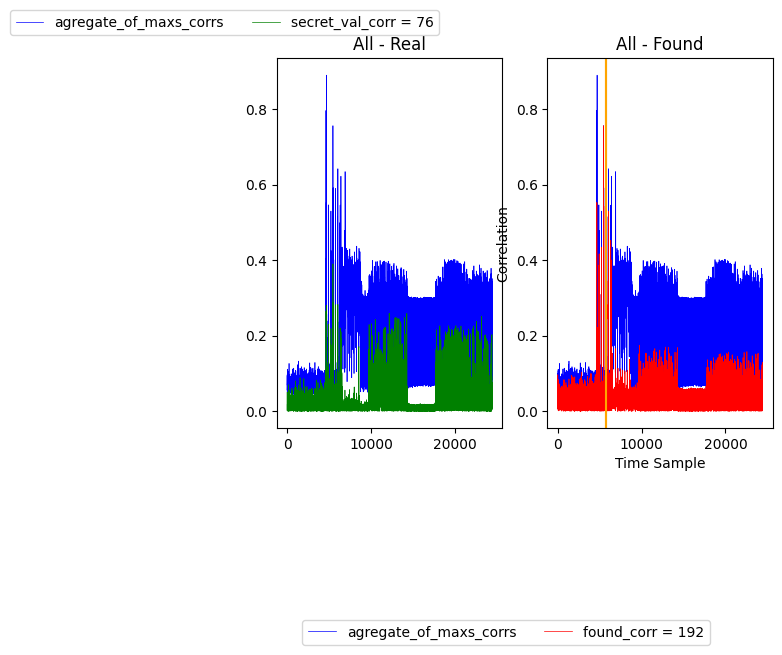

Hello 52
In range 5752 - 24429
 Found the soonest secret value is 1, at the time sample 6046, with correlation secret_corr = 0.598


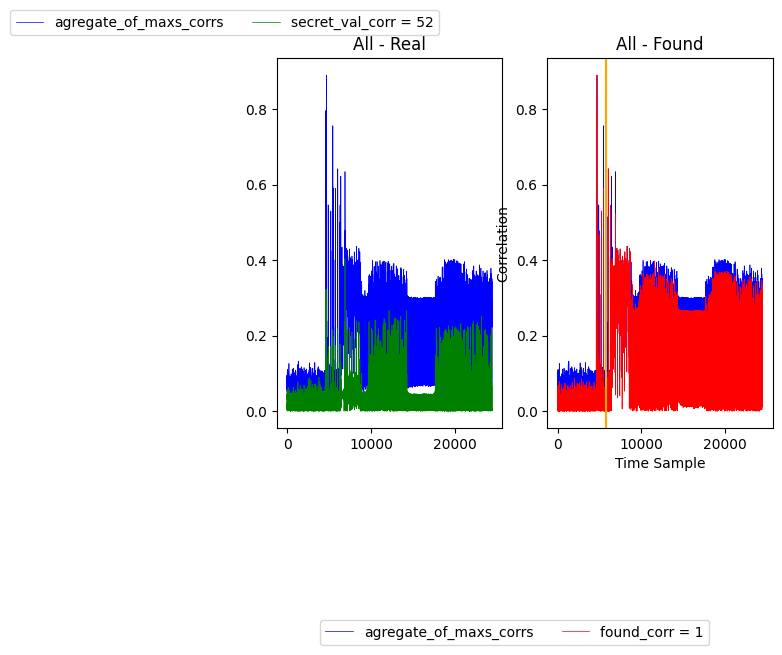

Hello 20
In range 5752 - 24429
 Found the soonest secret value is 1, at the time sample 6046, with correlation secret_corr = 0.598


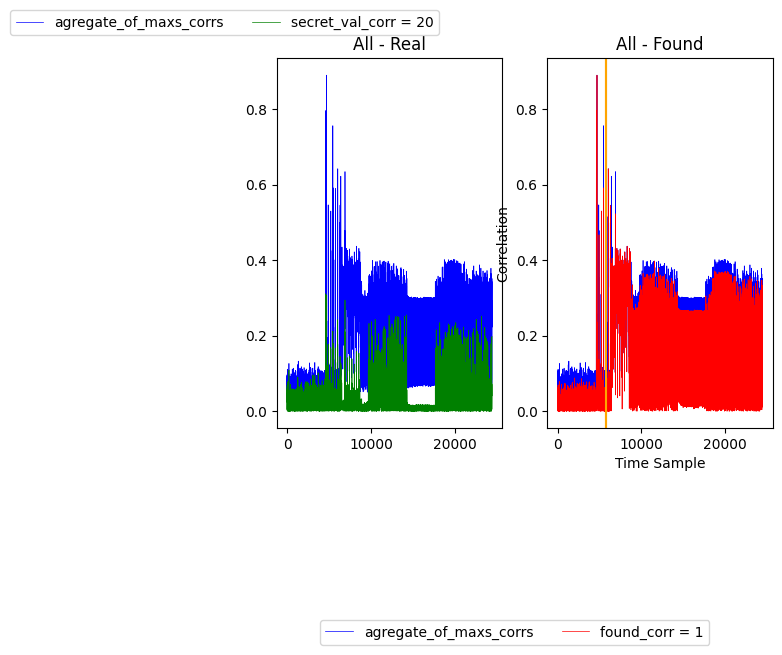

Hello 228
In range 5752 - 24429
 Found the soonest secret value is 1, at the time sample 6046, with correlation secret_corr = 0.598


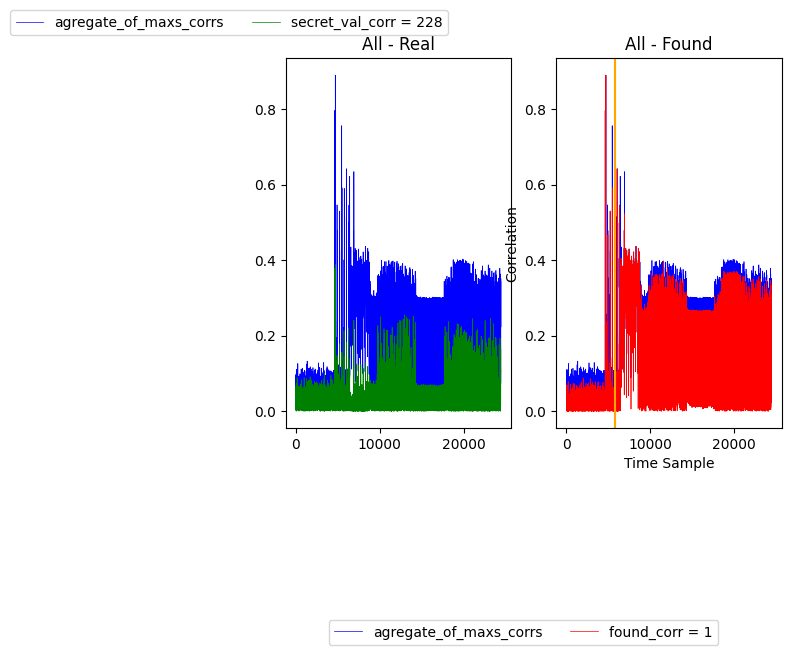

Hello 240
In range 5752 - 24429
 Found the soonest secret value is 1, at the time sample 6046, with correlation secret_corr = 0.598


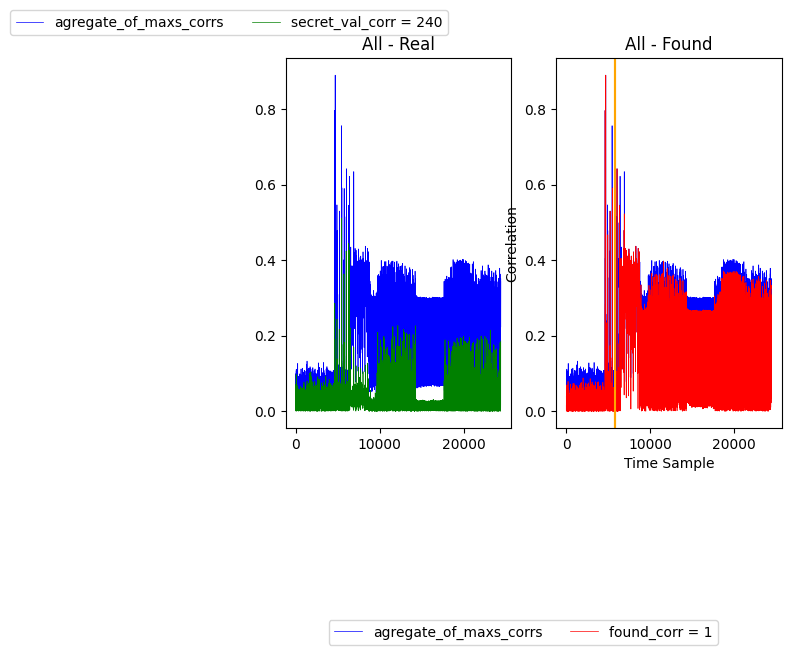

Hello 0
In range 5752 - 24429
 Found the soonest secret value is 1, at the time sample 6046, with correlation secret_corr = 0.598


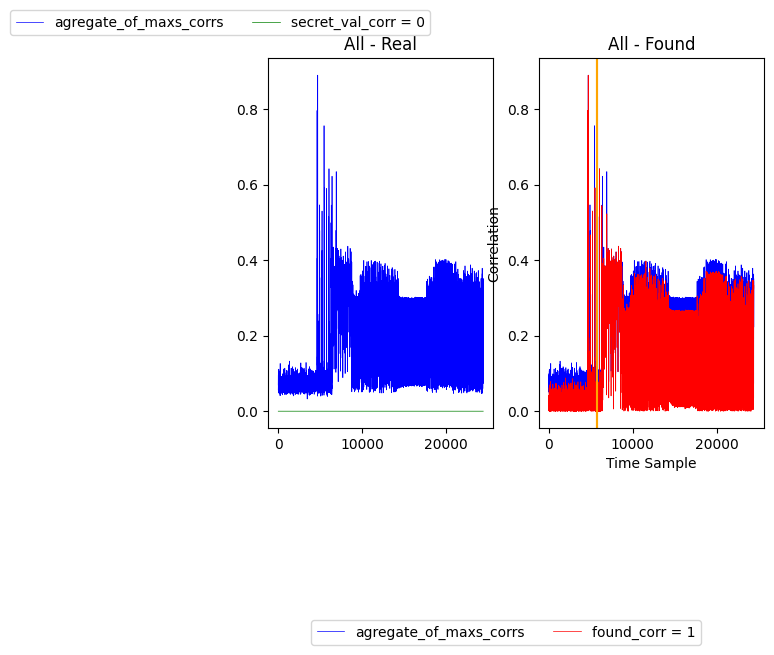

Hello 116
In range 5752 - 24429
 Found the soonest secret value is 1, at the time sample 6046, with correlation secret_corr = 0.598


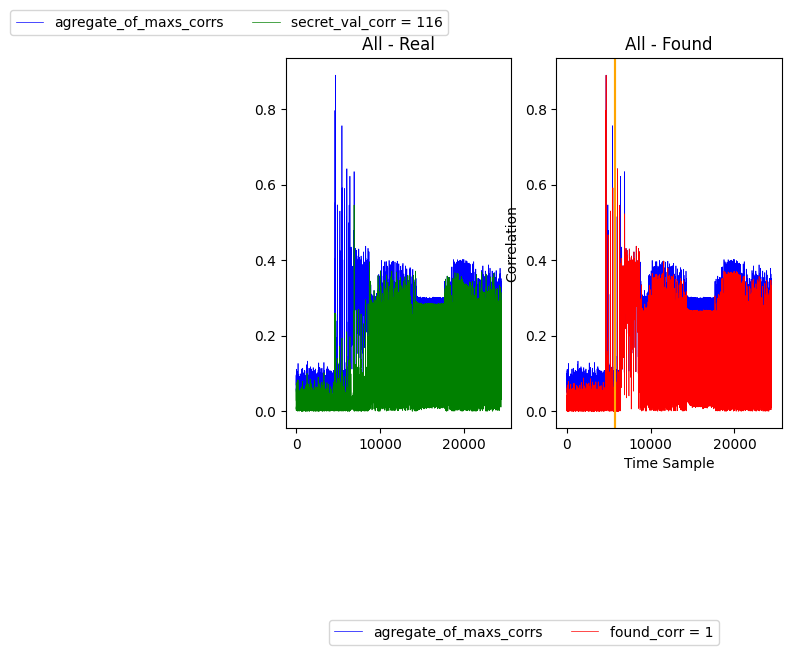

Hello 115
In range 5752 - 24429
 Found the soonest secret value is 1, at the time sample 6046, with correlation secret_corr = 0.598


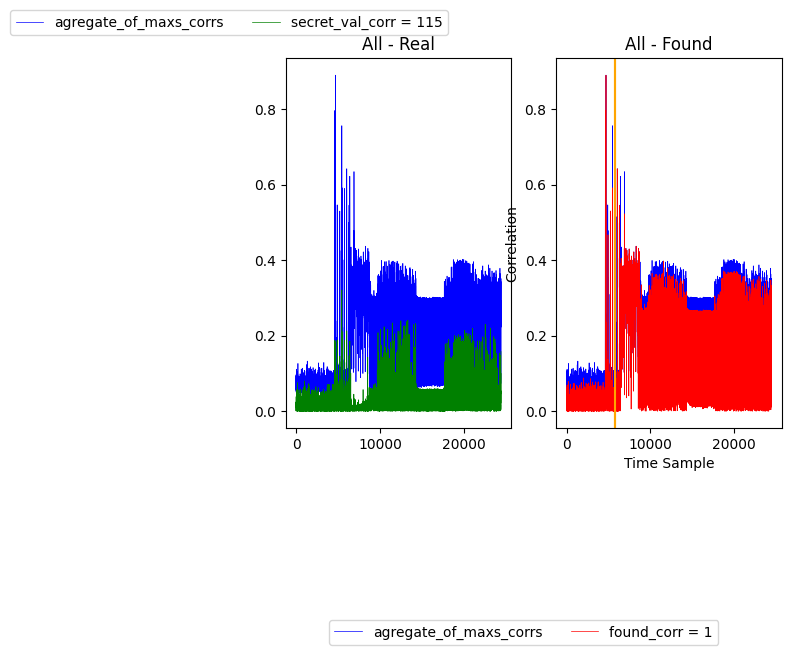

Hello 205
In range 5752 - 24429
 Found the soonest secret value is 1, at the time sample 6046, with correlation secret_corr = 0.598


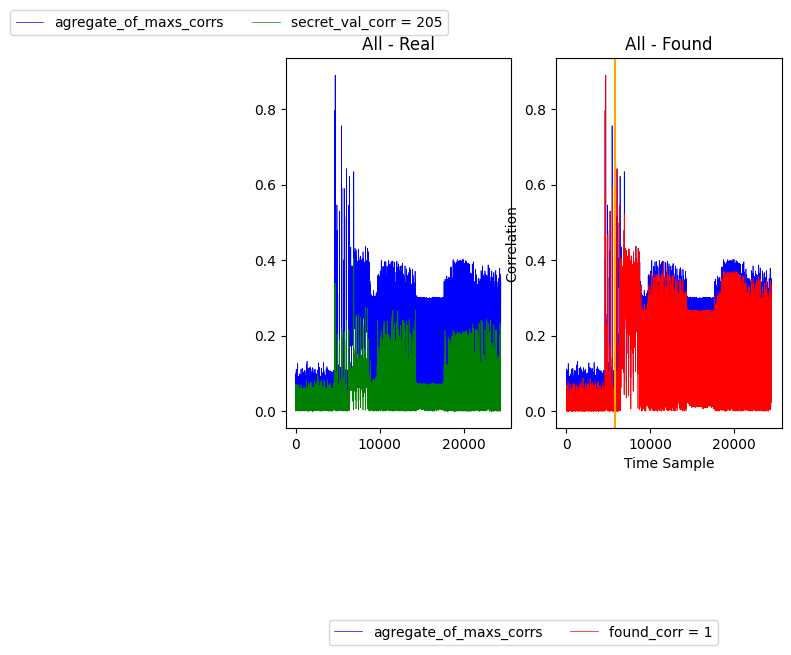

Hello 58
In range 5752 - 24429
 Found the soonest secret value is 1, at the time sample 6046, with correlation secret_corr = 0.598


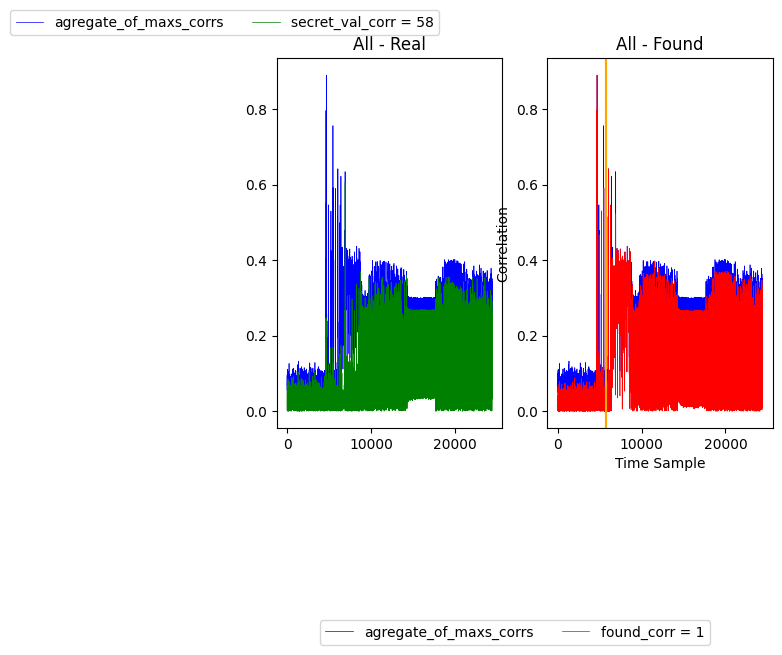

In [14]:
corr_map = abs(np.array(corr_HW8[:,:]))
analyse_corr(corr_map=corr_map, weights=np.array(out)[3:-4], stop_num = 12, maxims_map = None,
                 _index = 0, peak_range = 0.3, show_info=True, mountain_half_dist = 5, level = 3, saveName=f'HW8_{firmwareName}')

### Current Overview and findings: 